### 베타분포 (Beta Distribution)

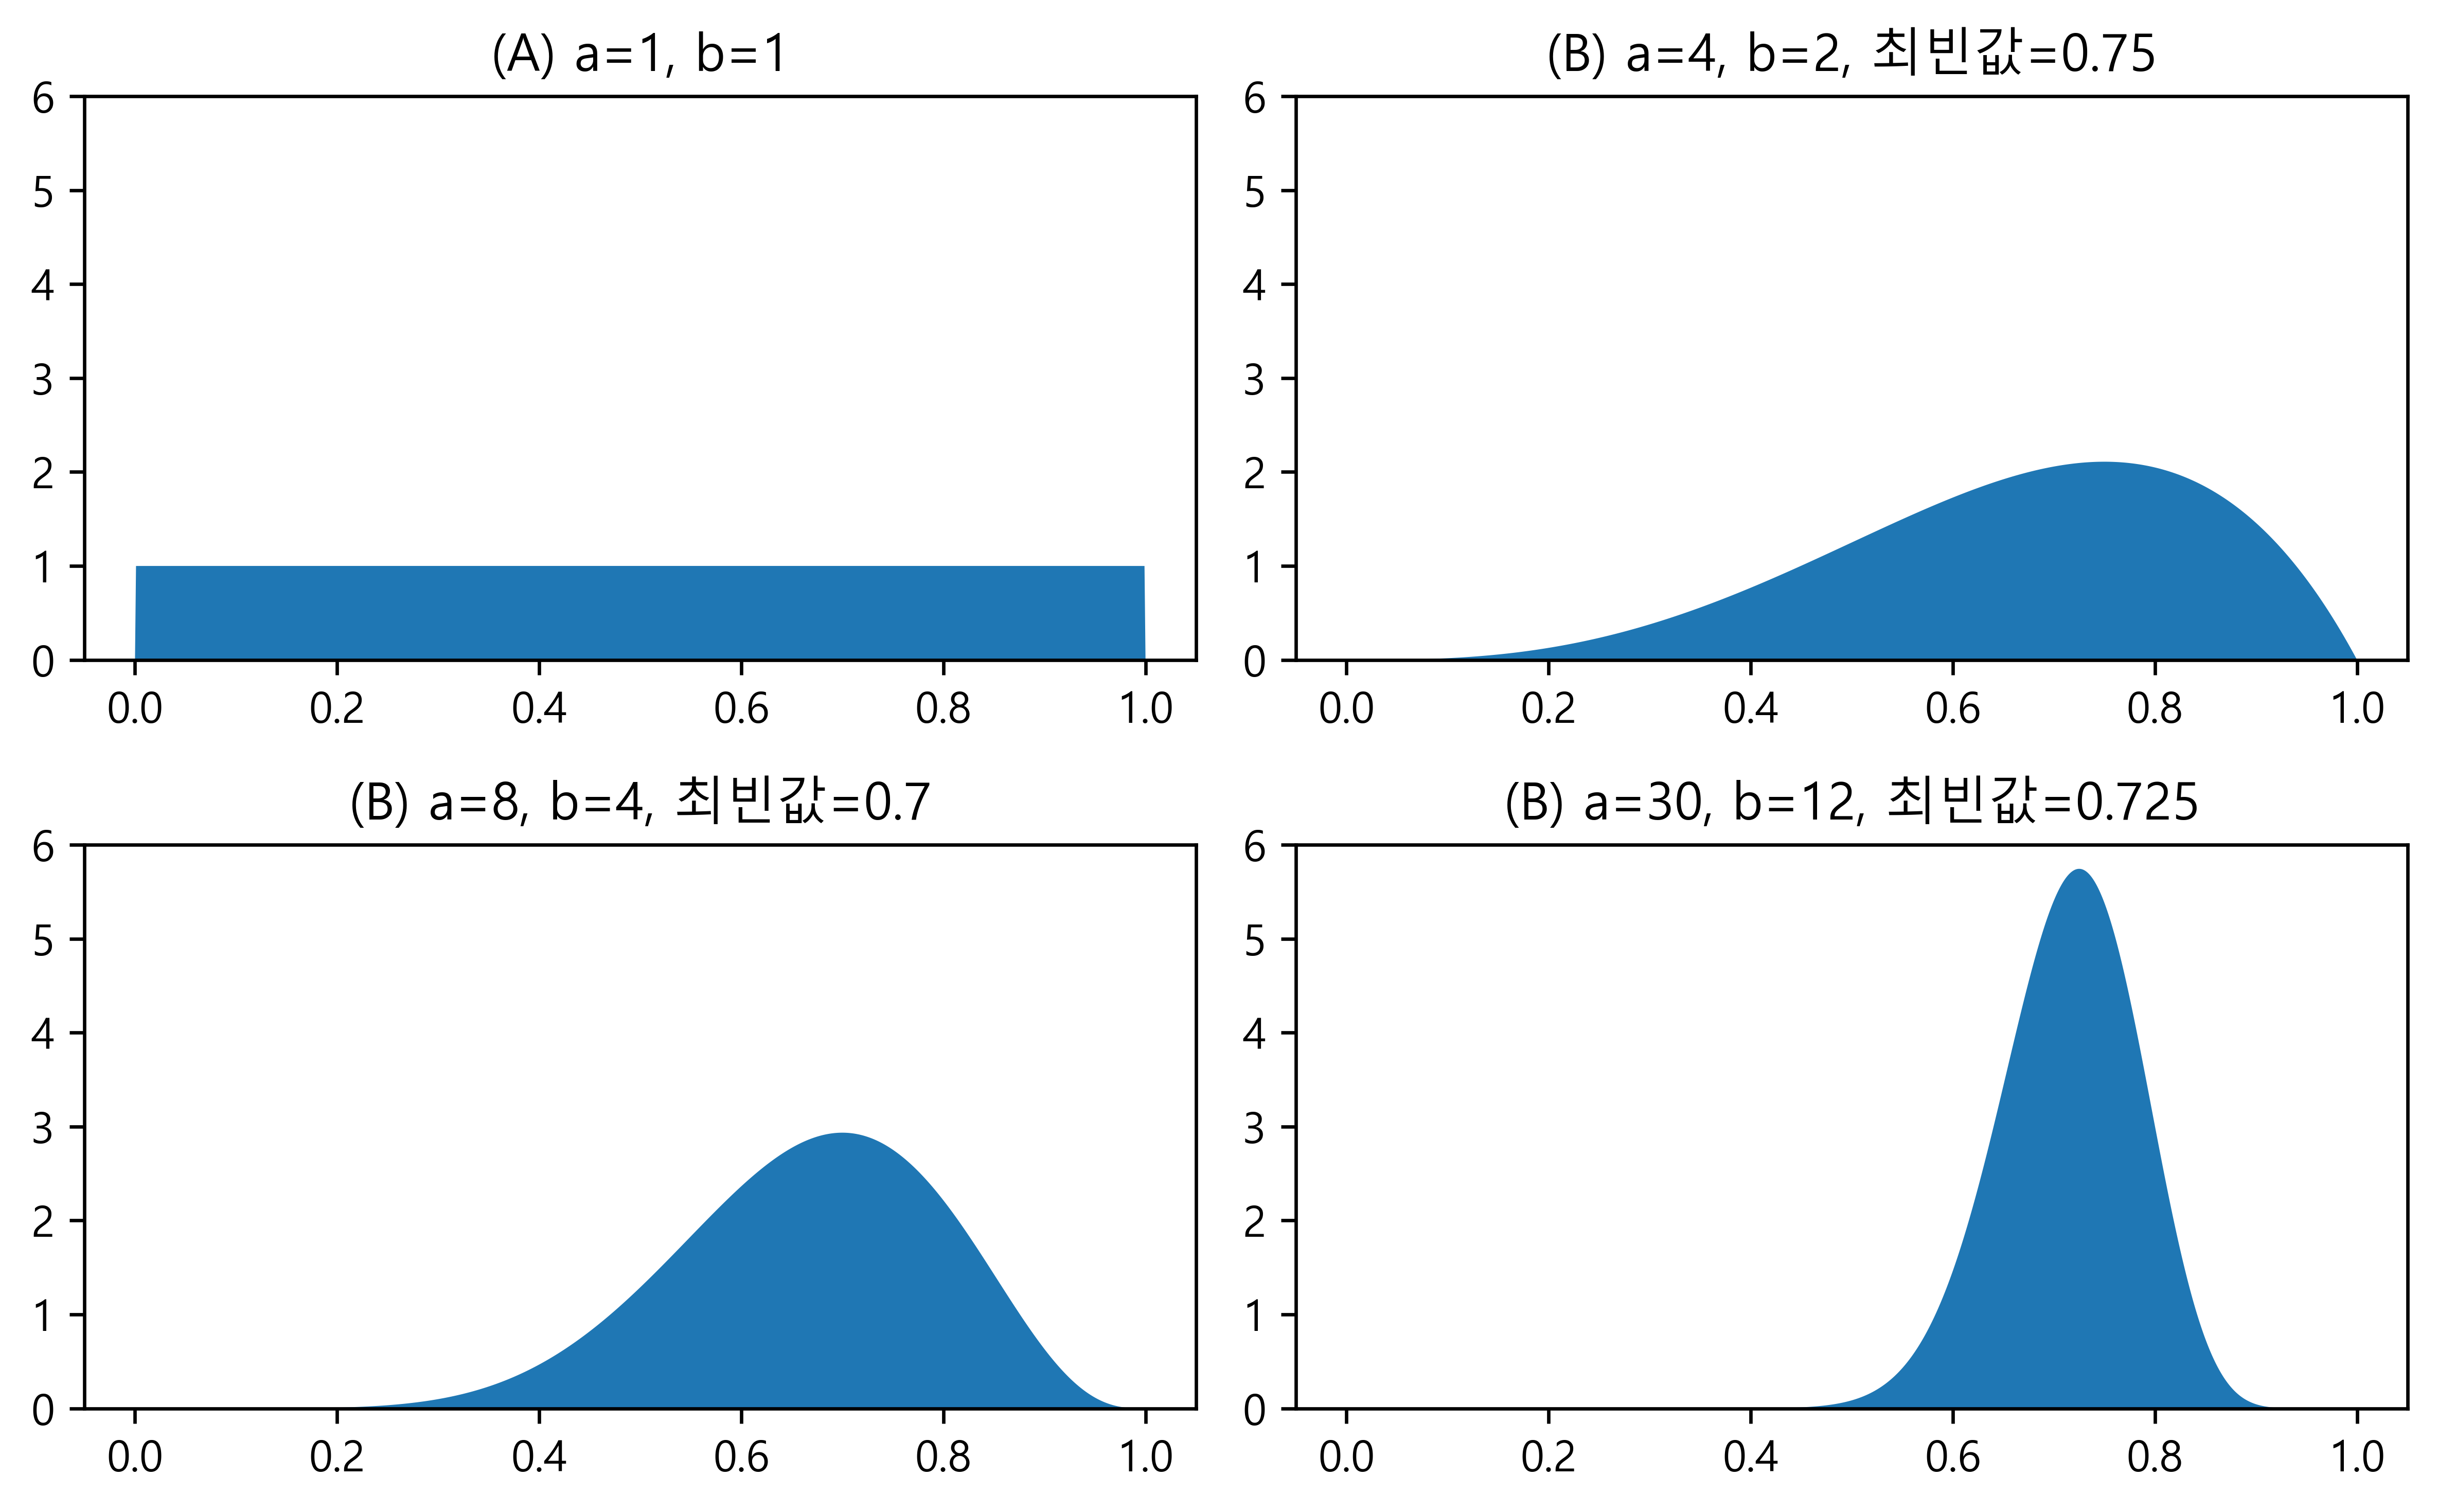

In [1]:
xx = np.linspace(0, 1, 1000)
plt.subplot(221) # subplot안에 들어가는 숫자의 의미?
plt.fill_between(xx, sp.stats.beta(1.0001, 1.0001).pdf(xx))
plt.ylim(0, 6)
plt.title("(A) a=1, b=1")
plt.subplot(222)
plt.fill_between(xx, sp.stats.beta(4, 2).pdf(xx))
plt.ylim(0, 6)
plt.title("(B) a=4, b=2, 최빈값={0}".format((4-1)/(4+2-2)))
plt.subplot(223)
plt.fill_between(xx, sp.stats.beta(8, 4).pdf(xx))
plt.ylim(0, 6)
plt.title("(B) a=8, b=4, 최빈값={0}".format((8-1)/(8+4-2)))
plt.subplot(224)
plt.fill_between(xx, sp.stats.beta(30, 12).pdf(xx))
plt.ylim(0, 6)
plt.title("(B) a=30, b=12, 최빈값={0}".format((30-1)/(30+12-2)))
plt.tight_layout()
plt.show()

이 그림으로부터 모수 a, b가 베타분포의 모양을 결정하는 형상 인자(shape factor)라는 것을 알 수 있다.

위 그림이 베이지안 추정 결과라면 각각은 베르누이분포의 모수 mu에 대해 다음과 같이 추정한 것과 같다.

(A) 베르누이분포의 모수 mu를 추정할 수 없다. (정보가 없음)

(B) 베르누이분포의 모수 mu값이 0.75일 가능성이 가장 크다. (정확도 낮음)

(C) 베르누이분포의 모수 mu값이 0.70일 가능성이 가장 크다. (정확도 중간)

(D) 베르누이분포의 모수 mu값이 0.725일 가능성이 가장 크다. (정확도 높음)

### 감마분포 (Gamma Distribution)

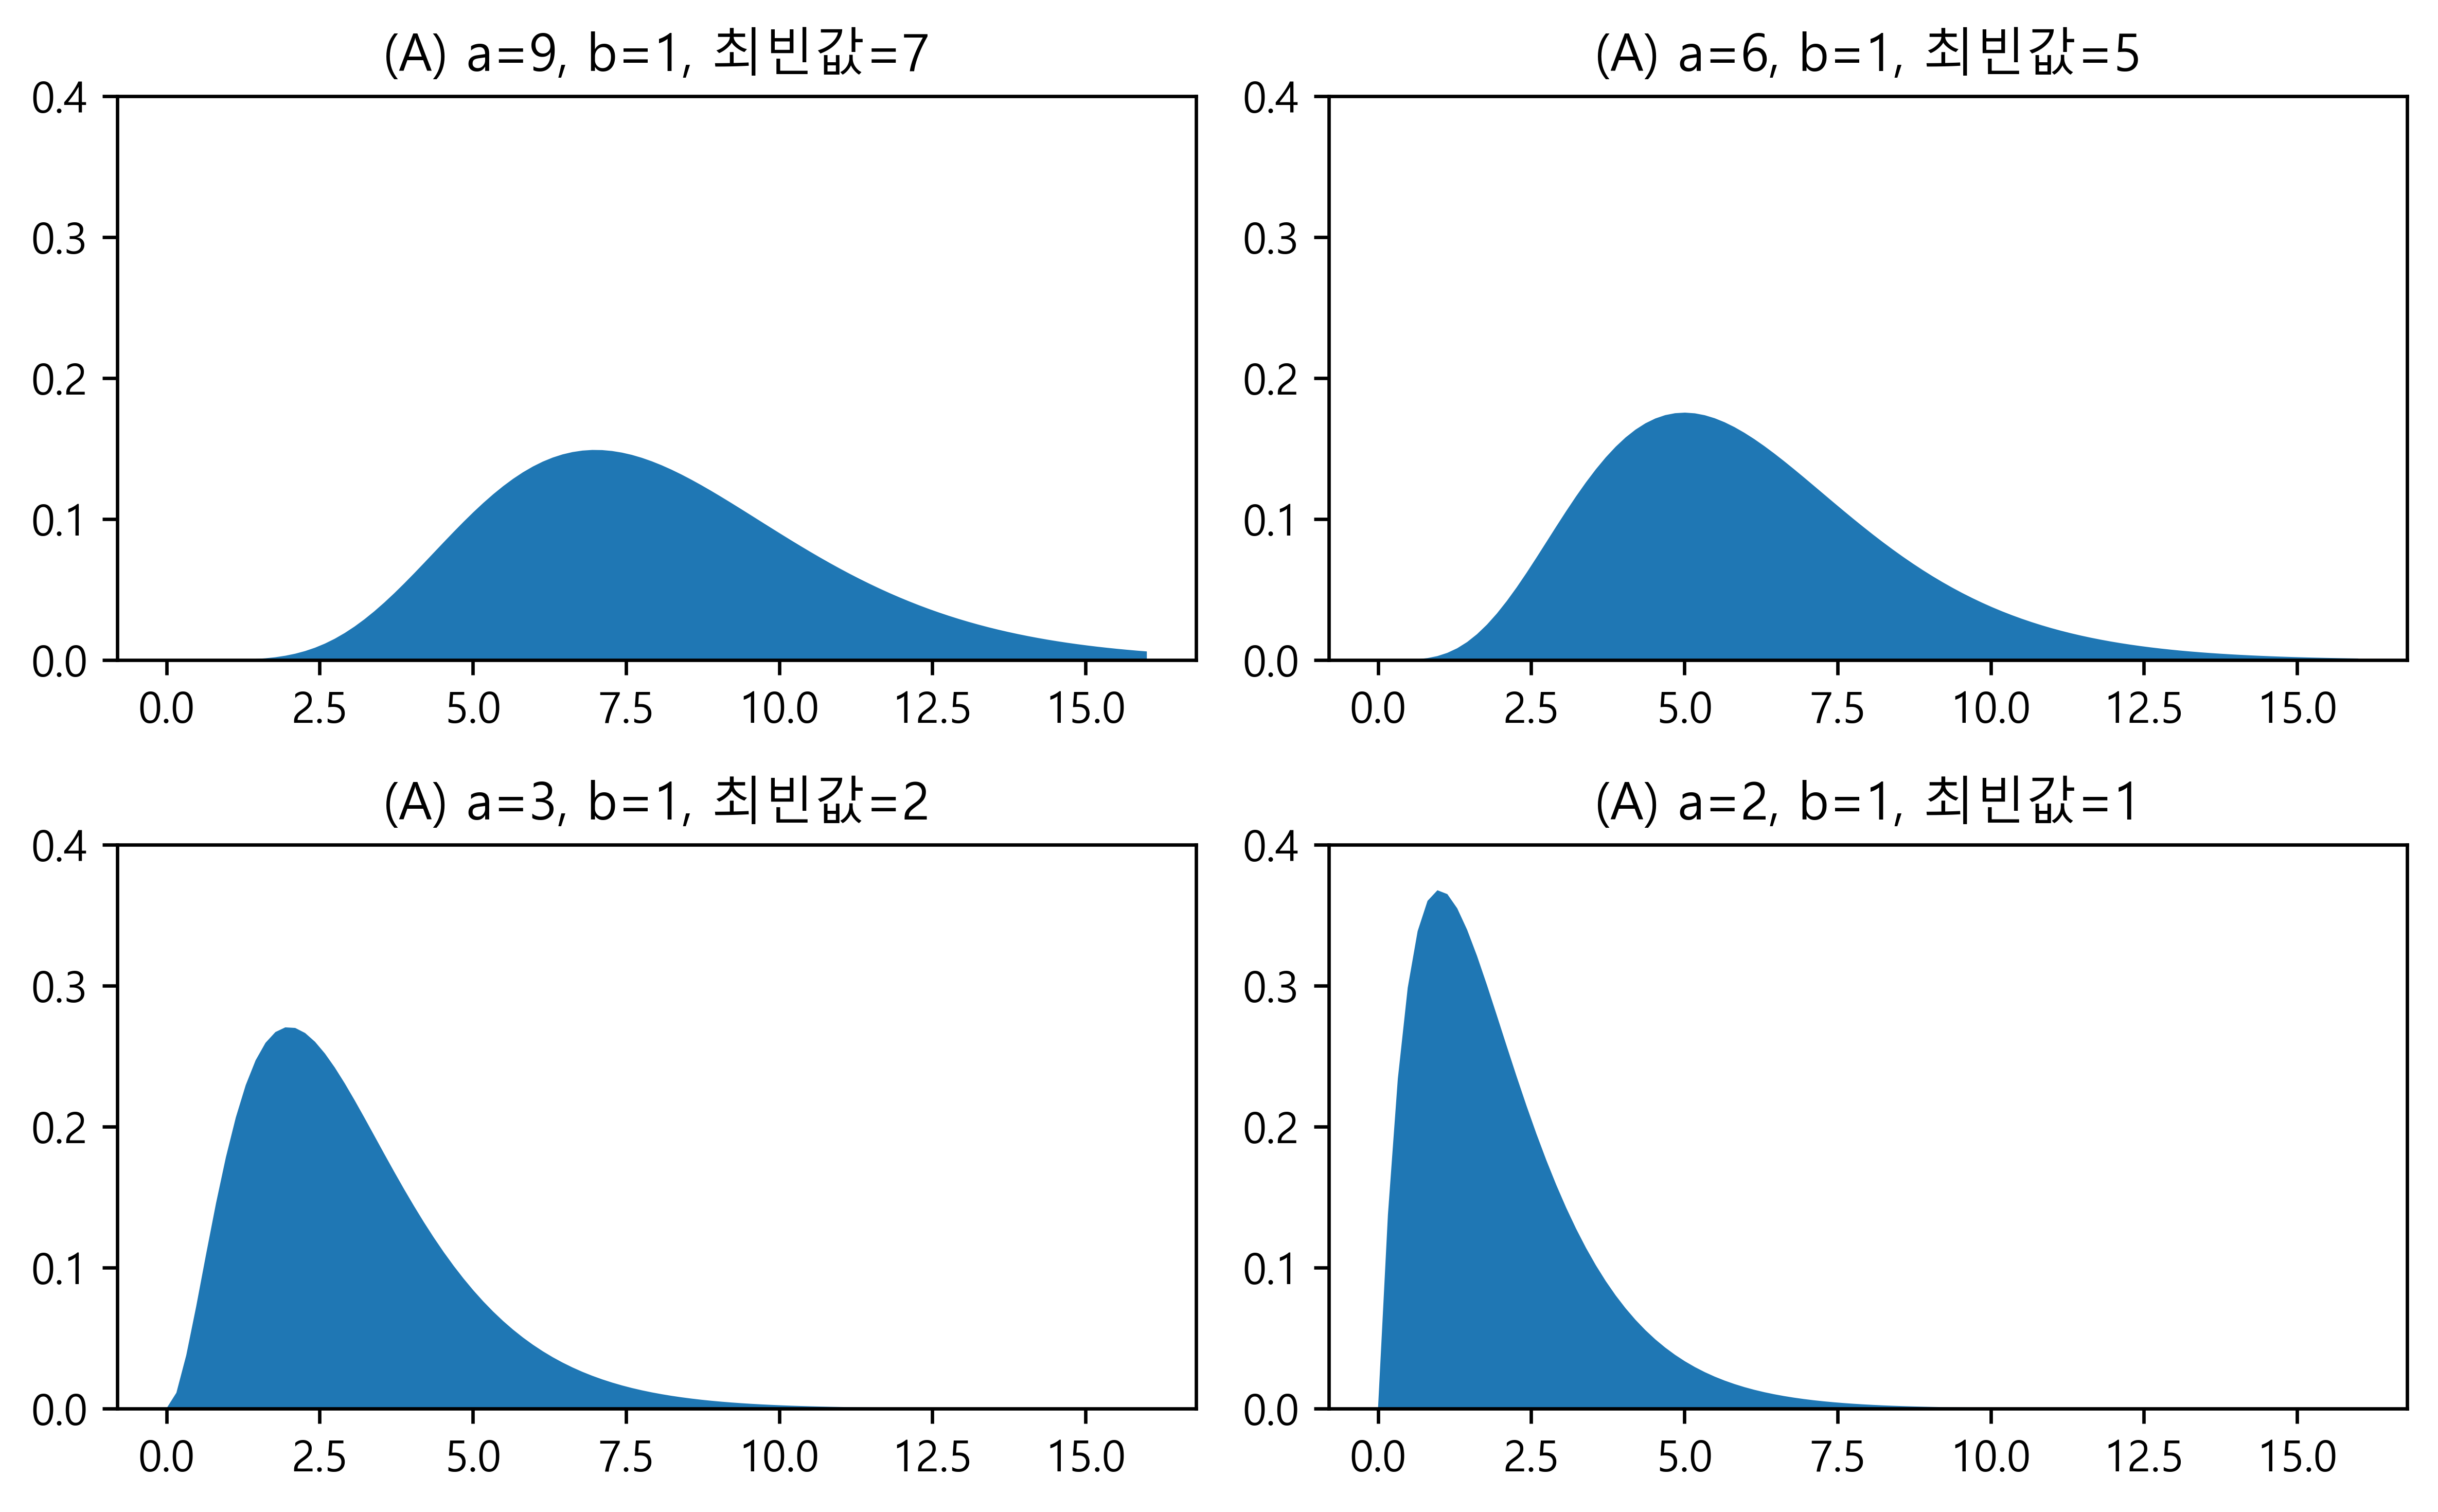

In [1]:
xx = np.linspace(0, 16, 100)
plt.subplot(221)
plt.fill_between(xx, sp.stats.gamma(8).pdf(xx))
plt.ylim(0, 0.4)
plt.title("(A) a=9, b=1, 최빈값=7")
plt.subplot(222)
plt.fill_between(xx, sp.stats.gamma(6).pdf(xx))
plt.ylim(0, 0.4)
plt.title("(A) a=6, b=1, 최빈값=5")
plt.subplot(223)
plt.fill_between(xx, sp.stats.gamma(3).pdf(xx))
plt.ylim(0, 0.4)
plt.title("(A) a=3, b=1, 최빈값=2")
plt.subplot(224)
plt.fill_between(xx, sp.stats.gamma(2).pdf(xx))
plt.ylim(0, 0.4)
plt.title("(A) a=2, b=1, 최빈값=1")
plt.tight_layout()
plt.show()

위 그림이 베이지안 추정 결과라면 각각은 모수에 대해 다음과 같이 추정한 것과 같다.

(A): 추정하고자 하는 모숫값이 8일 가능성이 가장 크다. (정확도 아주 낮음)

(B): 추정하고자 하는 모숫값이 5일 가능성이 가장 크다. (정확도 낮음)

(C): 추정하고자 하는 모숫값이 2일 가능성이 가장 크다. (정확도 높음)

(D): 추정하고자 하는 모숫값이 1일 가능성이 가장 크다. (정확도 아주 높음)


## 디리클리분포의 응용

`x, y, z가 양의 난수일 때 항상 x + y + z = 1이 되게 하려면 어떻게 해야될까요? 모든 경우가 균등하게 나와야 합니다.`

이 문제는 K=3이고, a1 = a2 = a3인 디리클리분포의 특수한 경우이다.

K=3인 디리클리분제는 다음 그림과 같이 3차원 공간 상에서 (1,0,0), (0,1,0), (0,0,1) 세 점을 연결하는 정삼각형 면위의 점을 생성하는 문제라고 볼 수 있다.

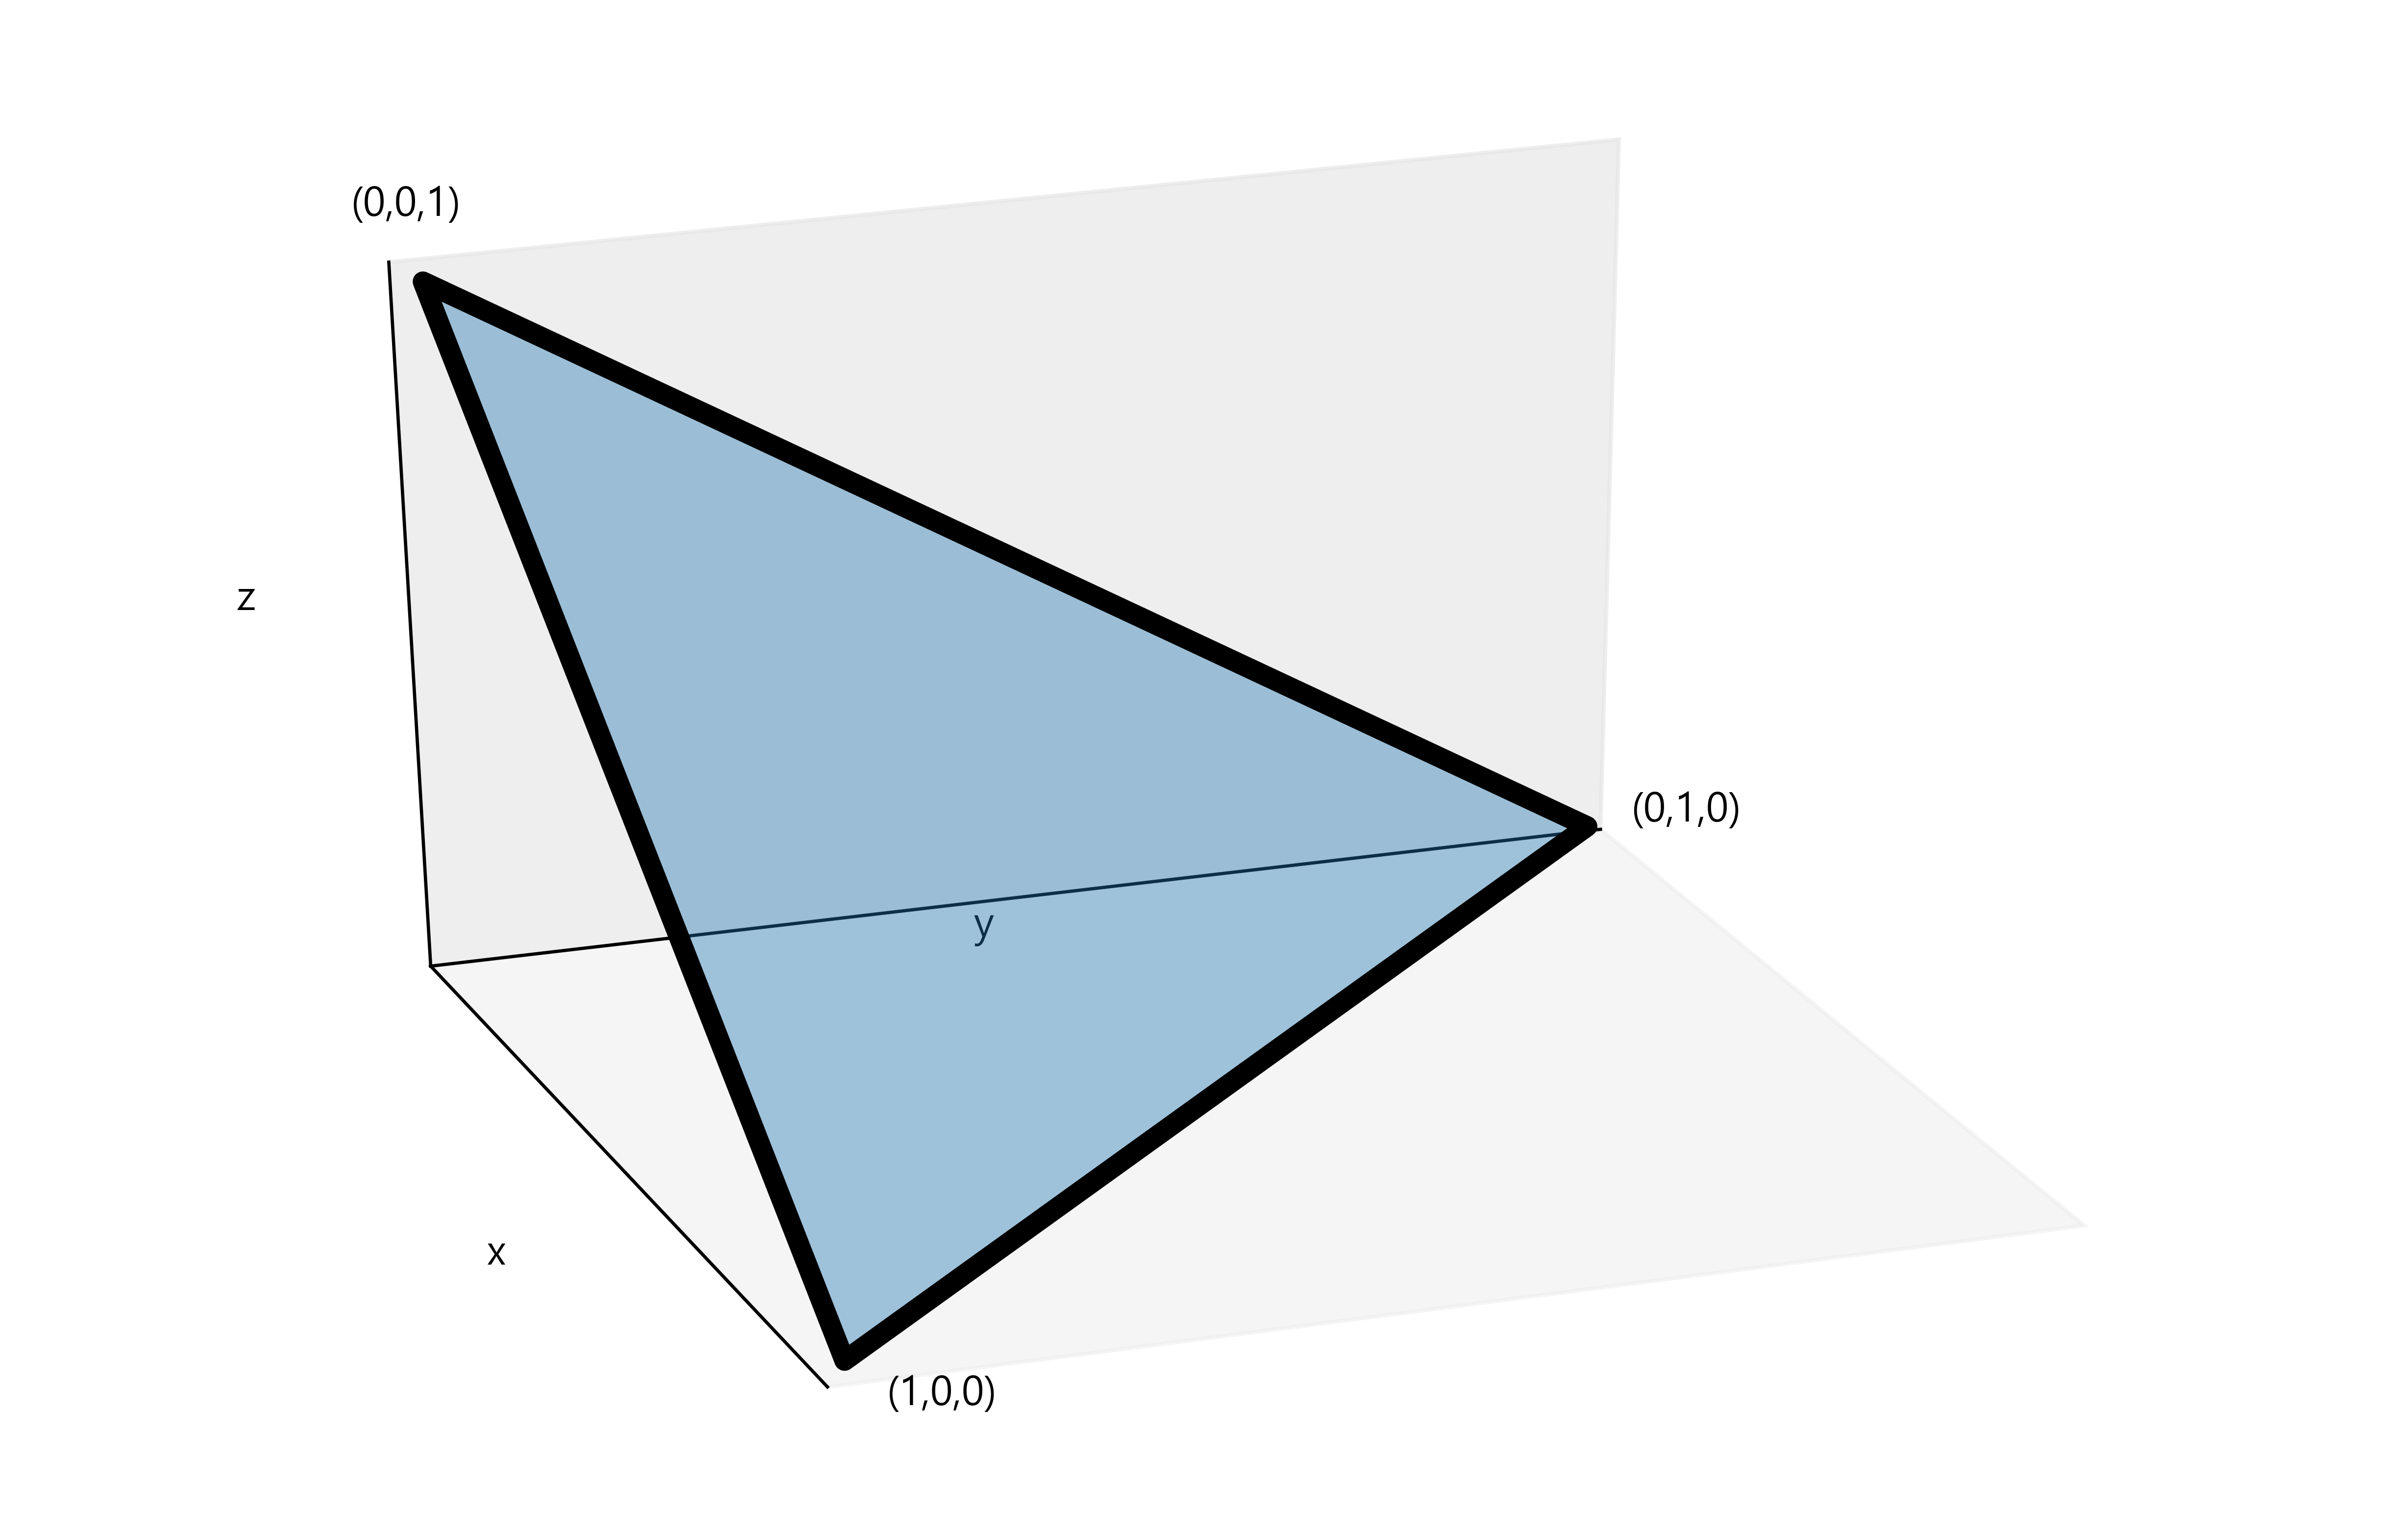

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure()
ax = Axes3D(fig)

x = [1, 0, 0]
y = [0, 1, 0]
z = [0, 0, 1]

verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, edgecolor="k", lw=5, alpha=0.4))
ax.text(1, 0, 0, "(1,0,0)", position=(1.1, 0))
ax.text(0, 1, 0, "(0,1,0)", position=(0, 1.04))
ax.text(0, 0, 1, "(0,0,1)", position=(-0.2, 0))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.view_init(30, -20)
tmp_planes = ax.zaxis._PLANES

# set origin
# http://stackoverflow.com/questions/15042129/changing-position-of-vertical-z-axis-of-3d-plot-matplotlib 참조
ax.yaxis._PLANES = (
    tmp_planes[2], tmp_planes[3],
    tmp_planes[0], tmp_planes[1],
    tmp_planes[4], tmp_planes[5],
)

ax.zaxis._PLANES = (
    tmp_planes[2], tmp_planes[3],
    tmp_planes[0], tmp_planes[1],
    tmp_planes[4], tmp_planes[5],
)

다음 함수는 생성된 점들을 2차원 삼각형 위에서 볼 수 있도록 그려주는 함수이다.

In [5]:
def plot_triangle(X, kind):
    n1 = np.array([1, 0, 0])
    n2 = np.array([0, 1, 0])
    n3 = np.array([0, 0, 1])
    n12 = (n1 + n2) / 2
    m1 = np.array([1, -1, 0])
    m2 = n3 - n12
    m1 = m1 / np.linalg.norm(m1)
    m2 = m2 / np.linalg.norm(m2)
    
    X1 = (X - n12).dot(m1)
    X2 = (X - n12).dot(m2)
    
    sns.jointplot(X1, X2, kind=kind, xlim=(-0.8, 0.8), ylim=(-0.1, 1.25))
    plt.show()

만약 이 문제를 단순하게 생각하여 서로 독립인 0과 1사이의 유니폼 확률변수를 3개 생성하고 이들의 합이 1이 되도록 크기를 정규화(normalize)하면 다음 그림과 같이 삼각형의 중앙 근처에 많은 확률 분포가 집중된다. 즉, 확률변수가 골고루 분포되지 않는다.

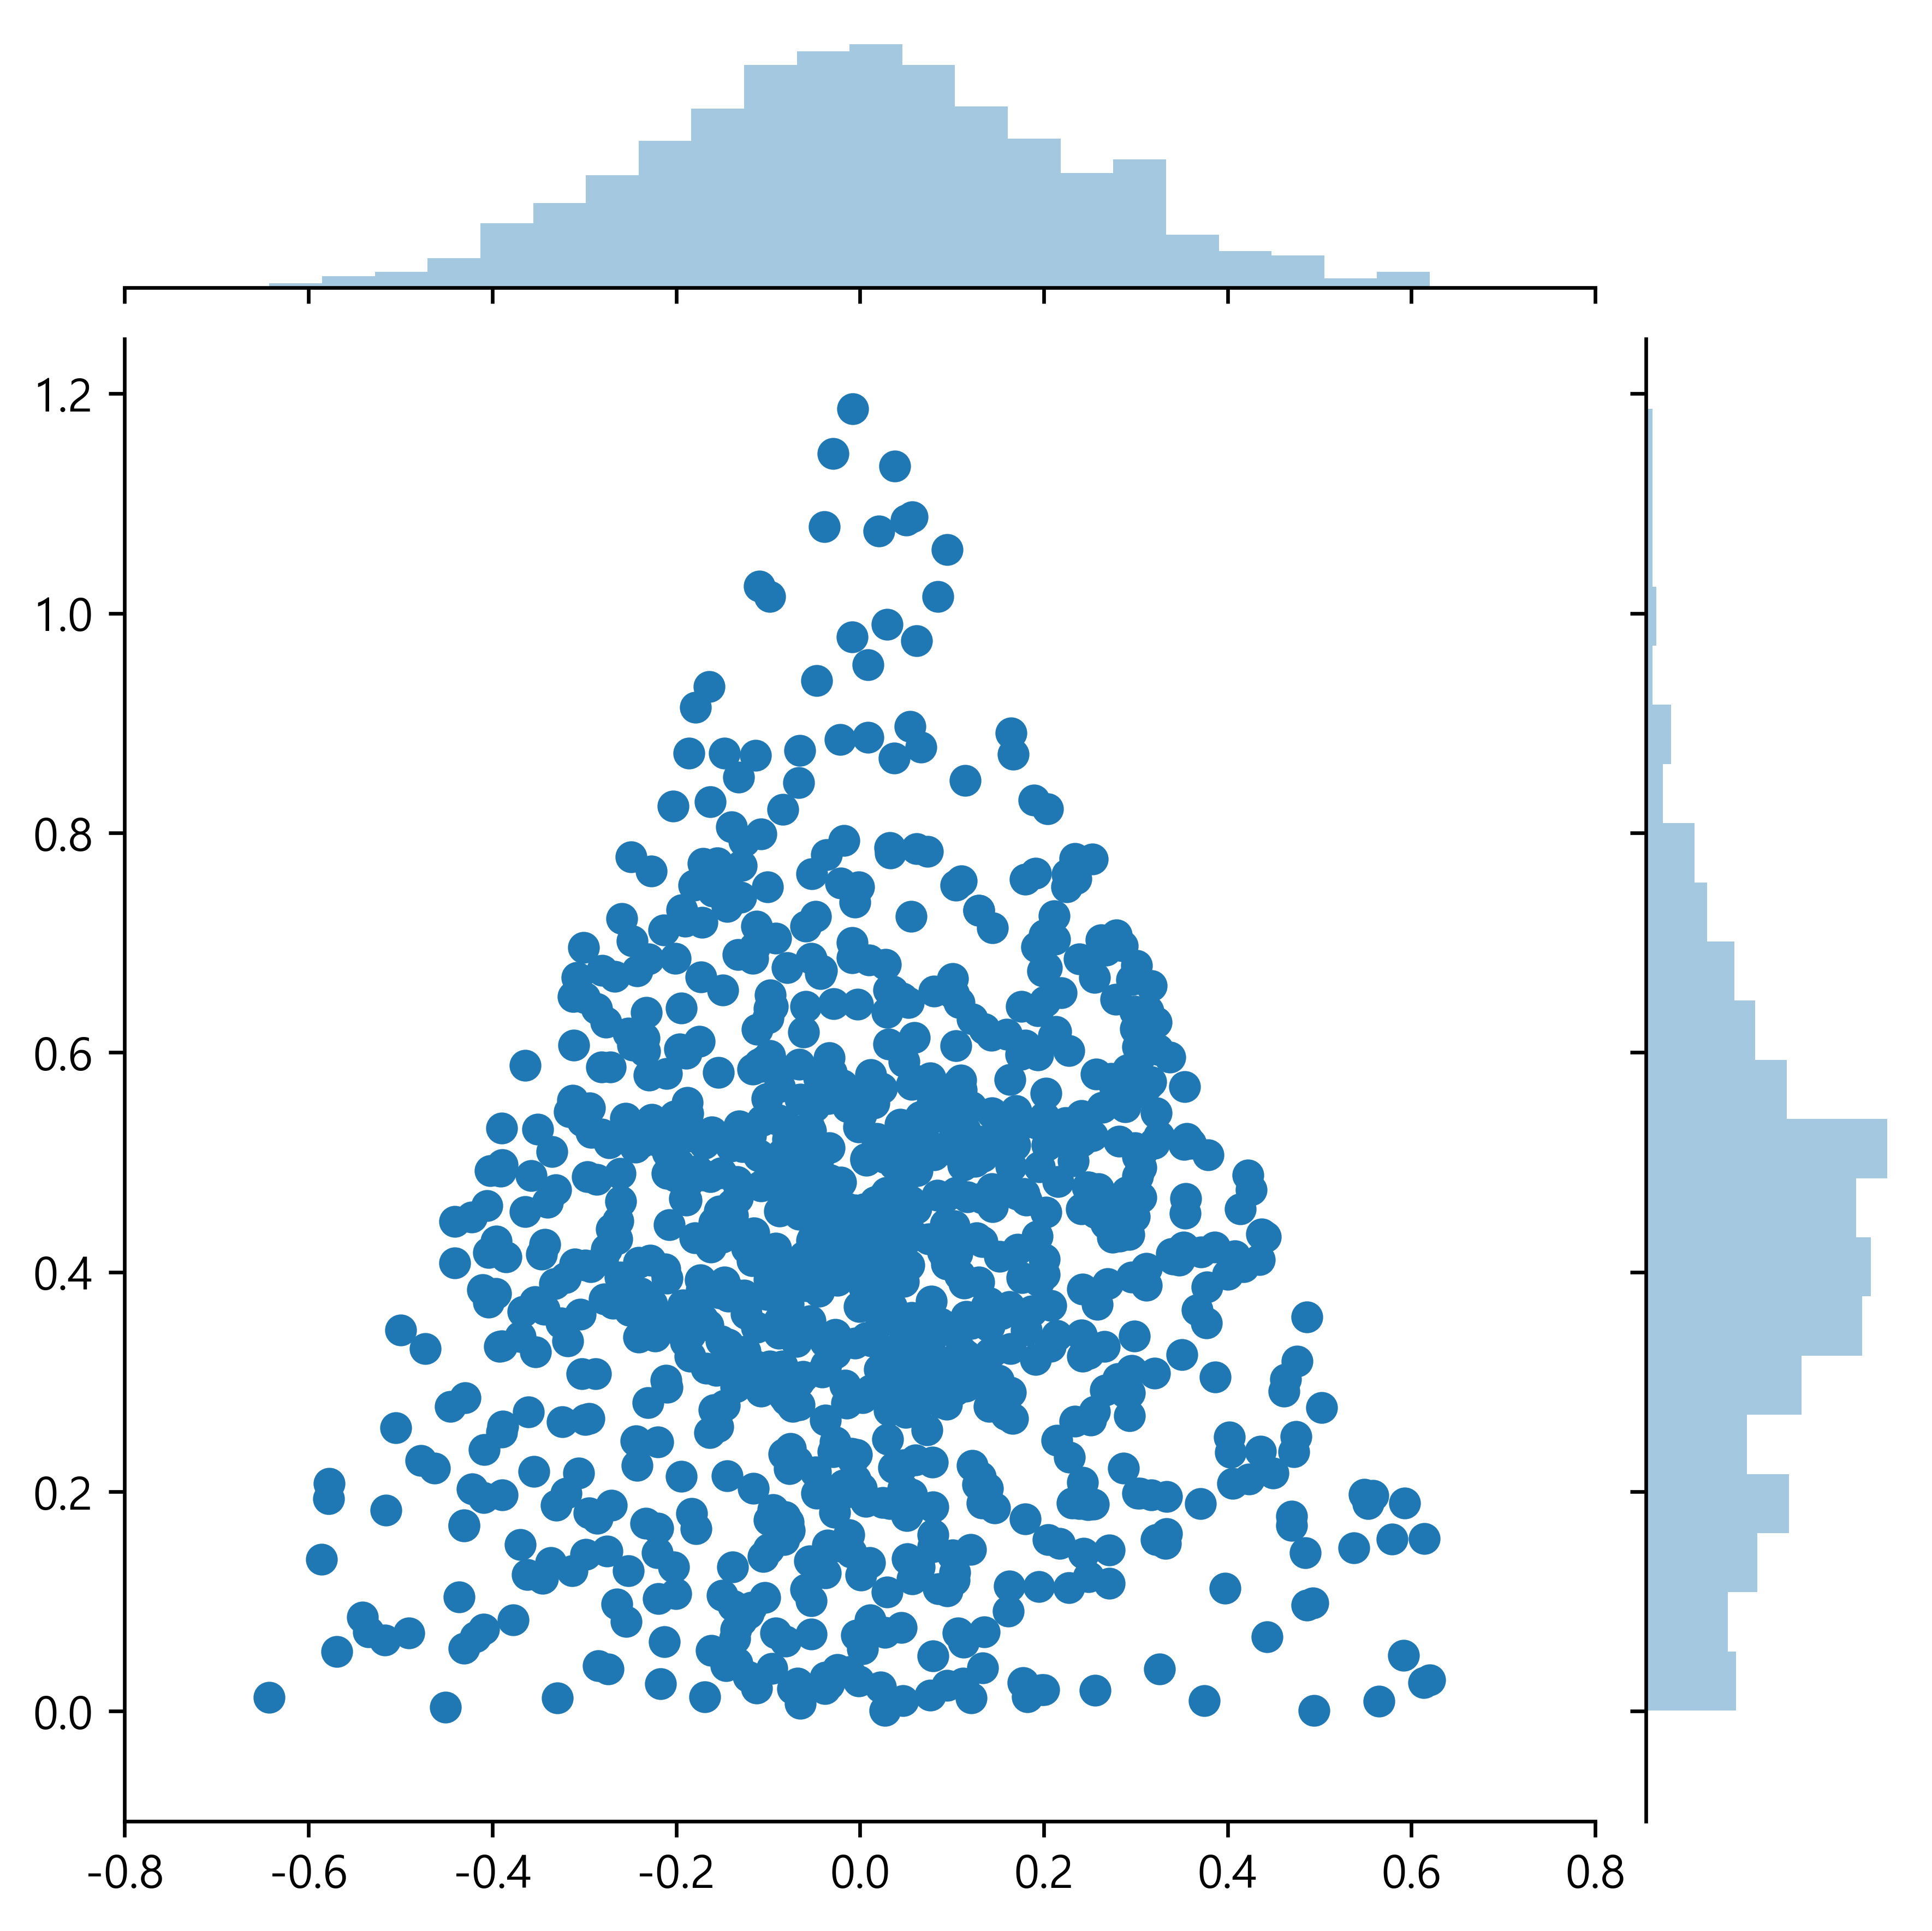

In [7]:
np.random.seed(0)
X1 = np.random.rand(1000, 3)
X1 = X1 / X1.sum(axis=1)[:, np.newaxis]
plot_triangle(X1, kind="scatter")

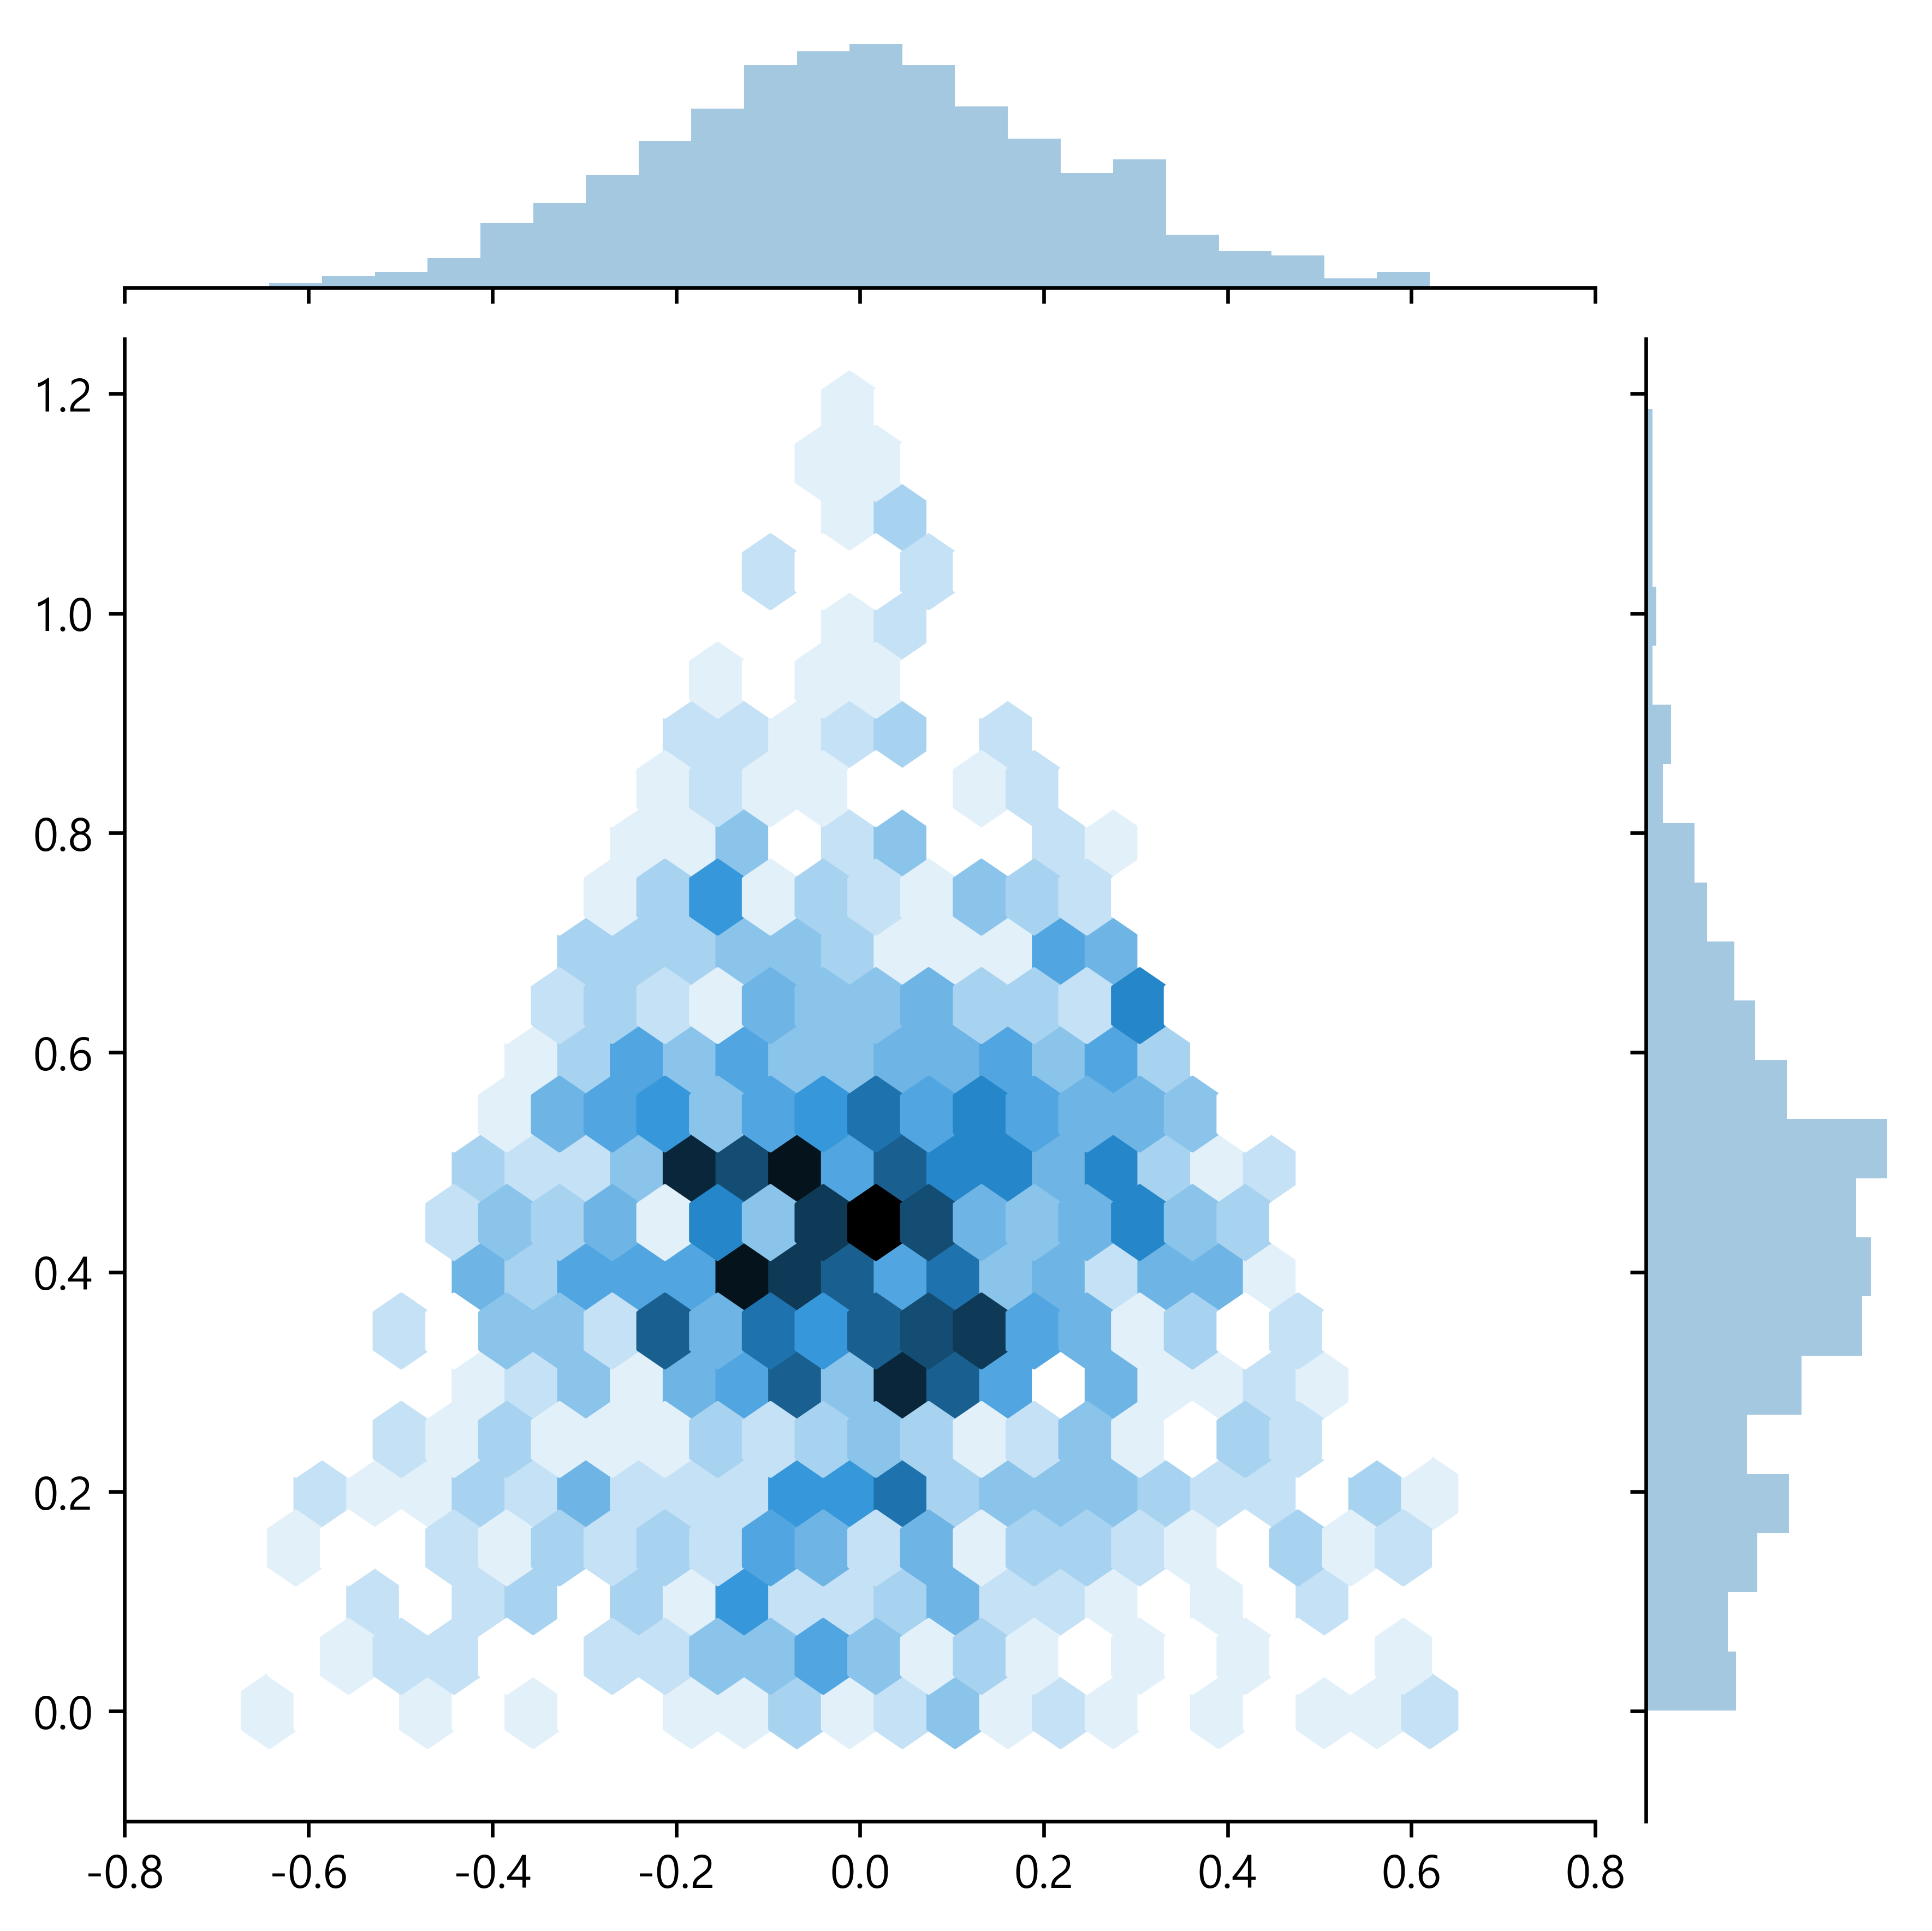

In [8]:
plot_triangle(X1, kind="hex")

그러나 a = (1,1,1)인 디리클리분포는 다음과 같이 골고루 샘플을 생성한다.

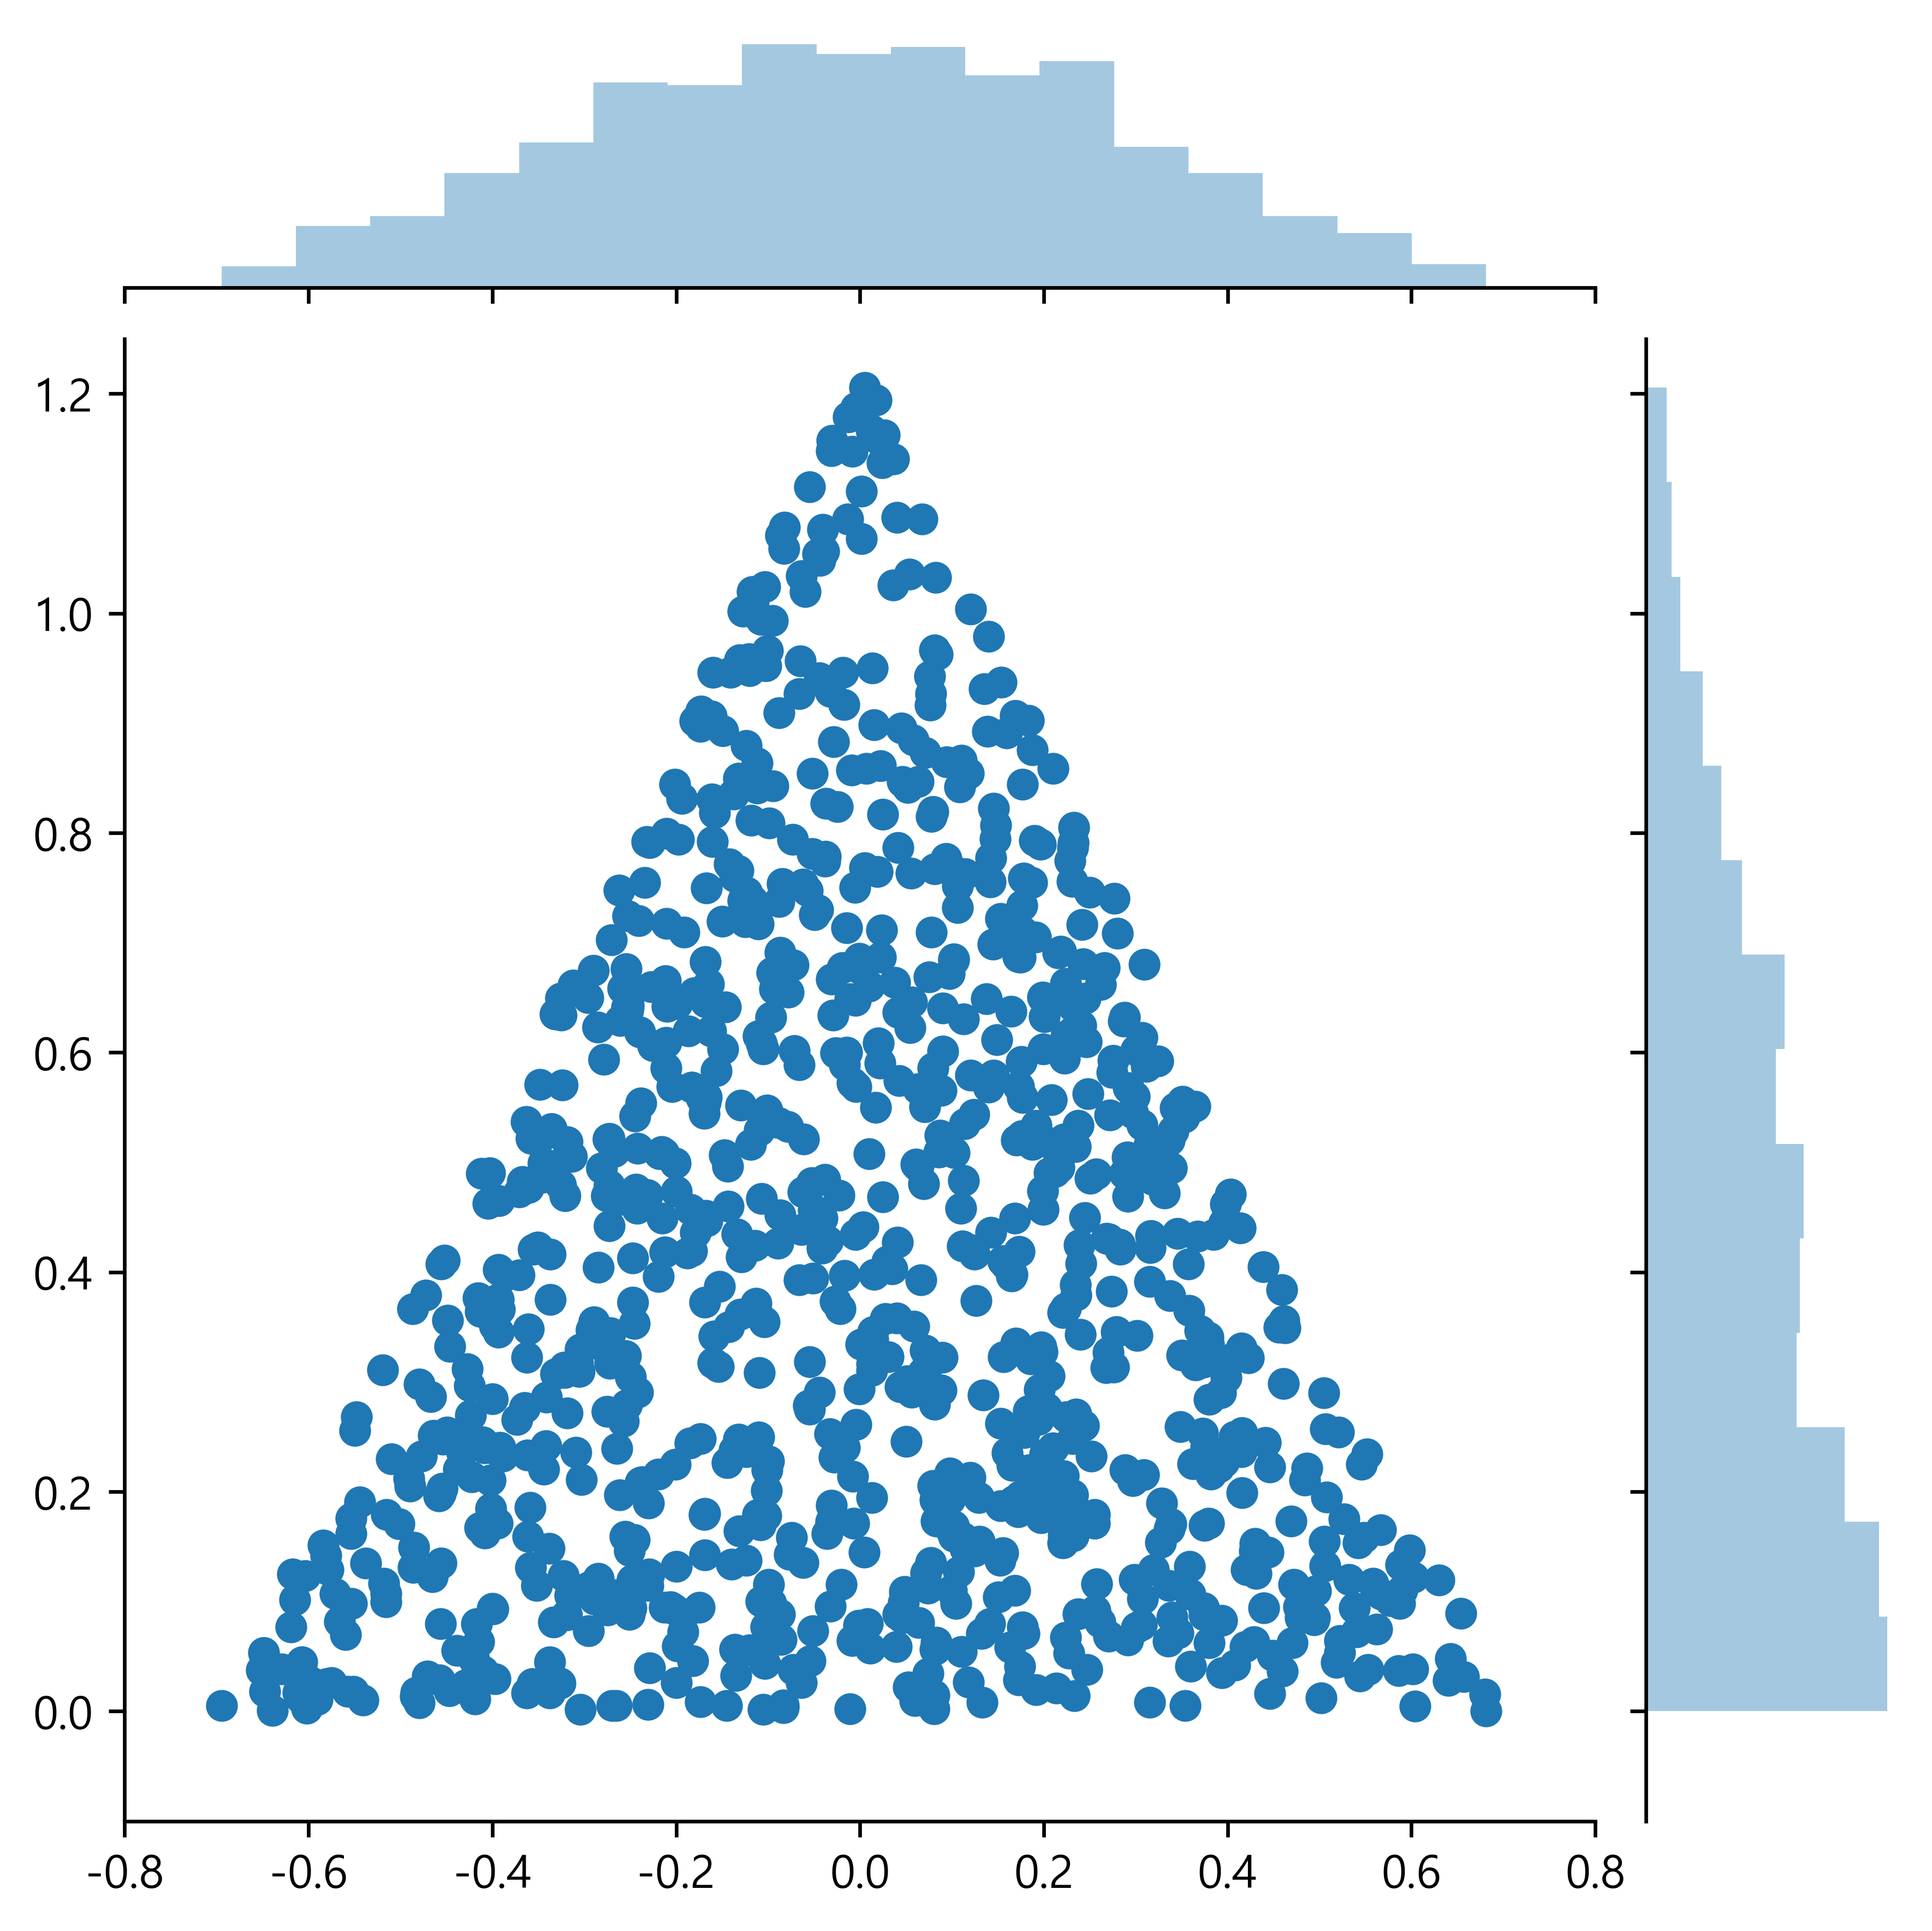

In [9]:
X2 = sp.stats.dirichlet((1,1,1)).rvs(1000)
plot_triangle(X2, kind="scatter")

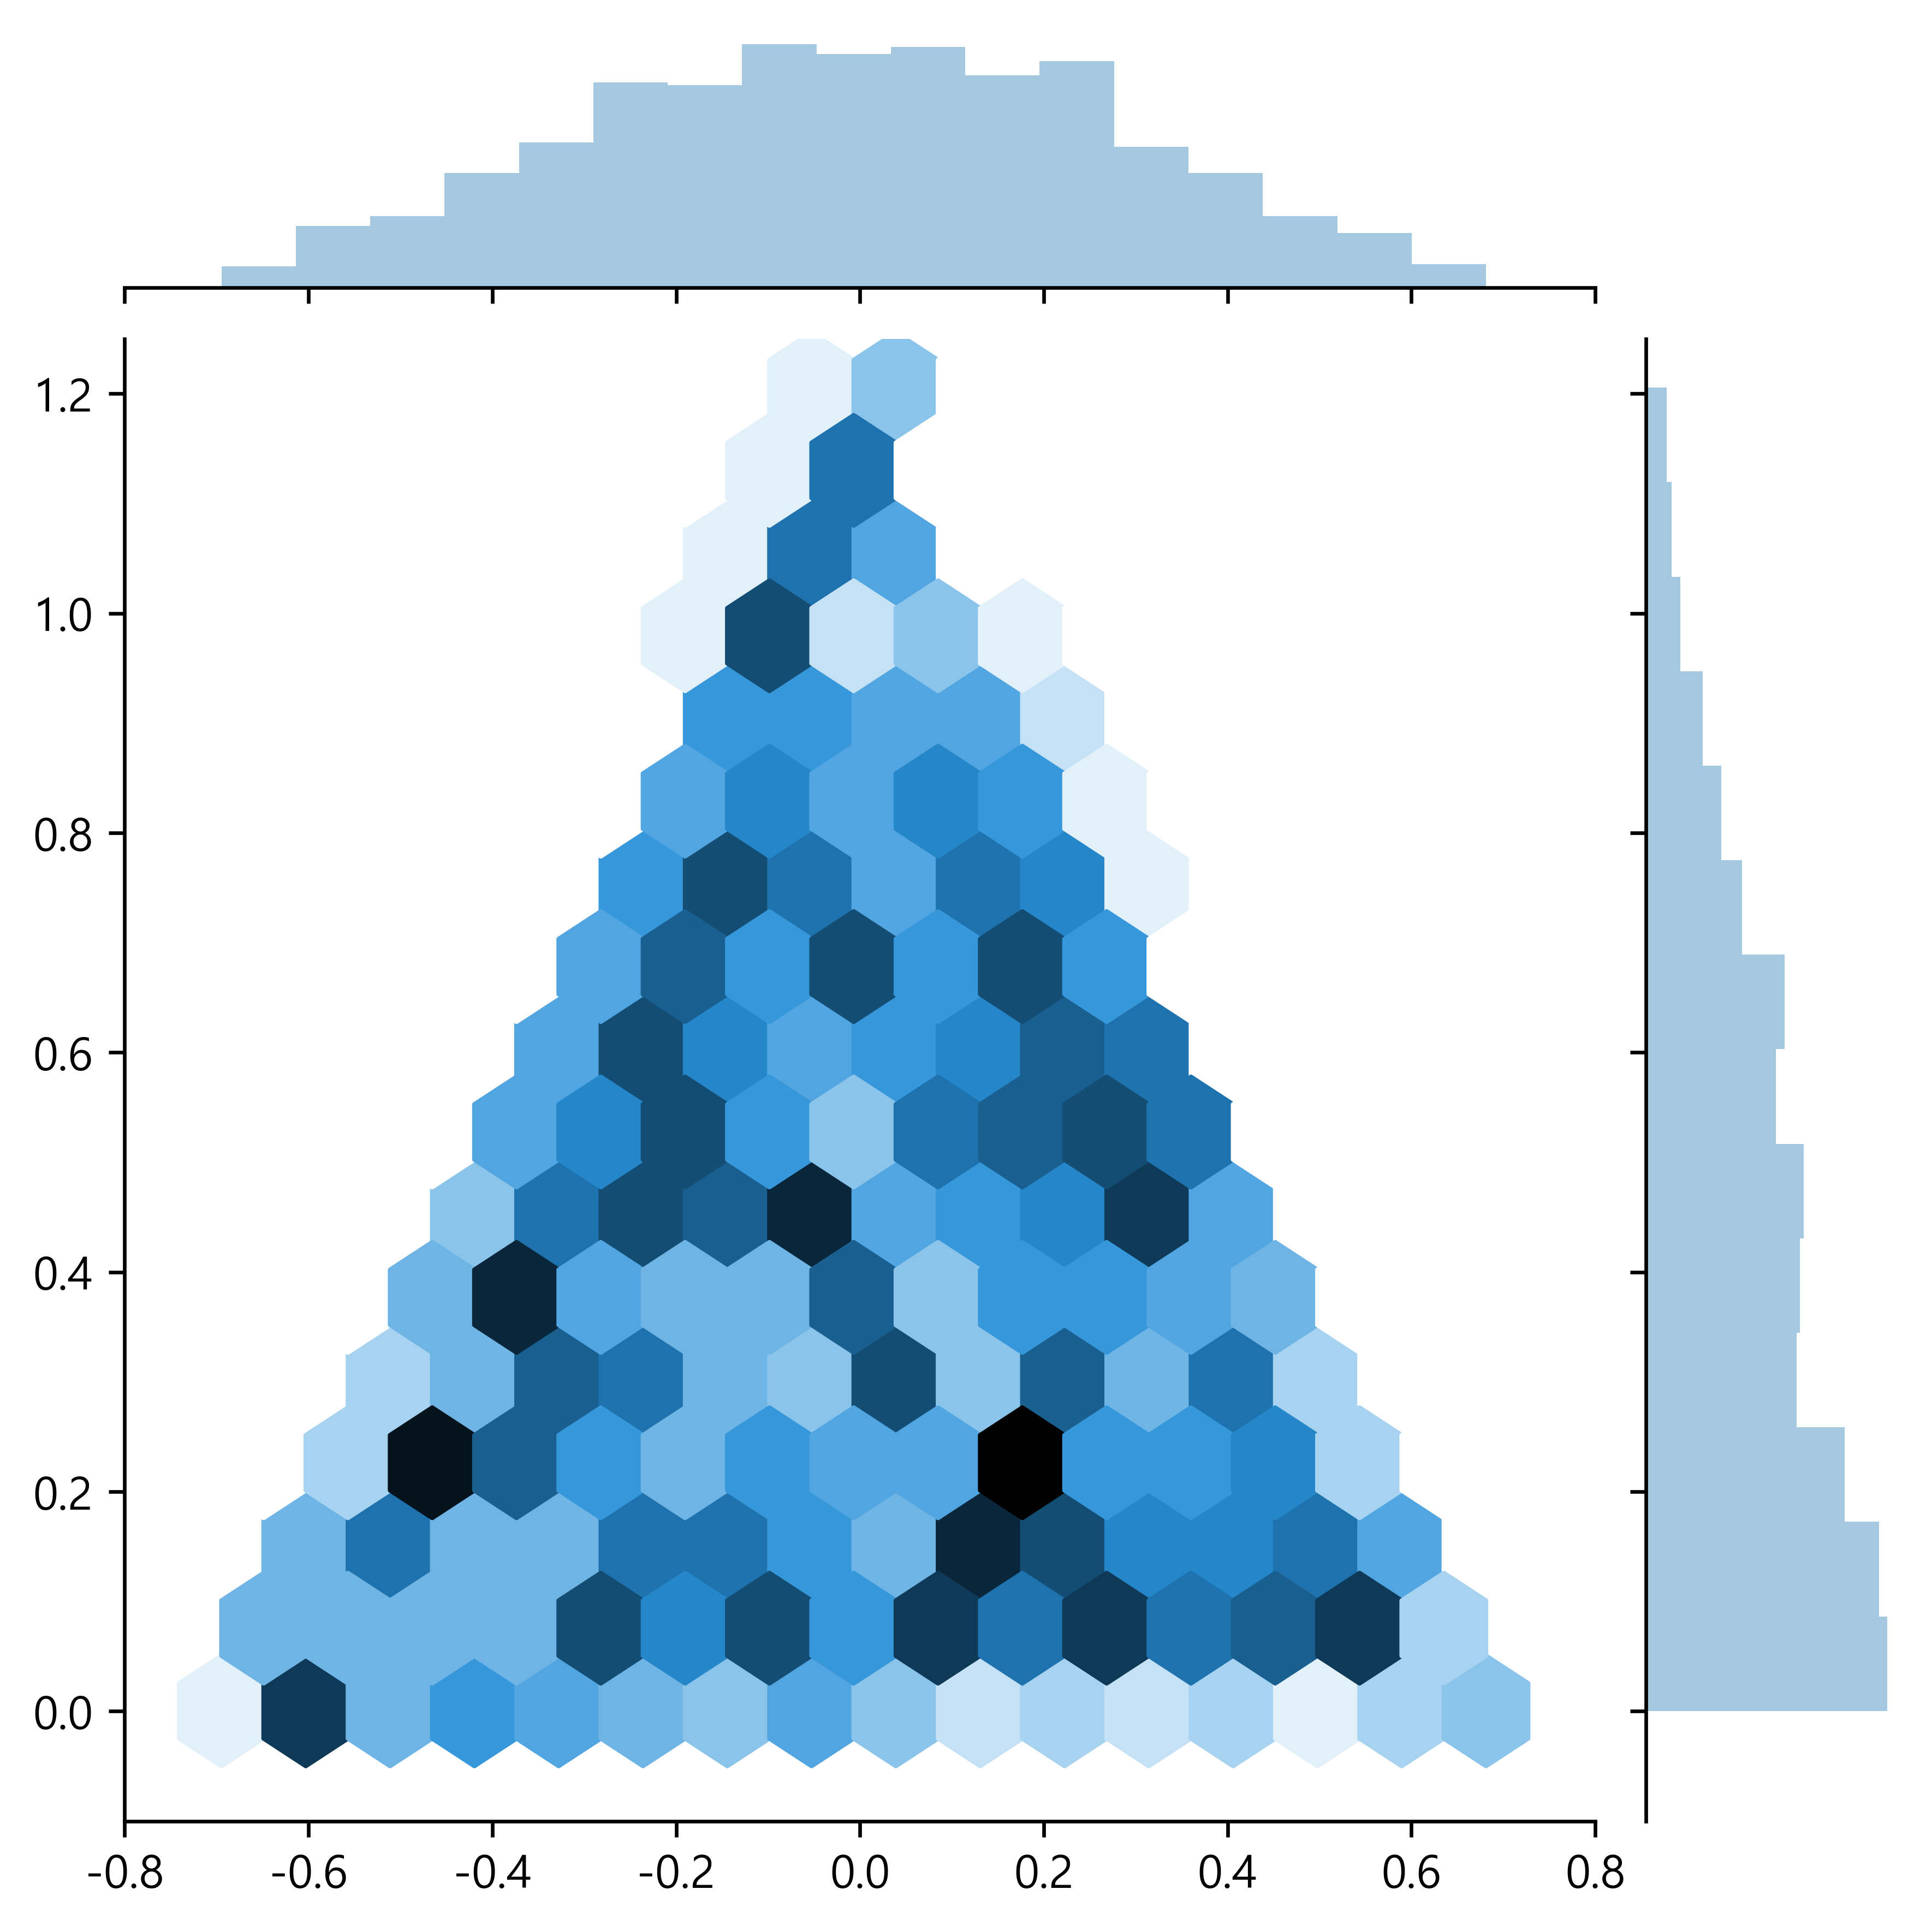

In [10]:
plot_triangle(X2, kind="hex")

### 베이지안 추정

모수 $\alpha$가 (1,1,1)이 아닌 경우에는 다음과 같이 특정 위치에 분포가 집중되도록 할 수 있다. 이 특성을 이용하면 카테고리분포의 모수 벡터 $\mu$를 추정한 결과를 나타낼 수 있다.

In [13]:
def project(x):
    n1 = np.array([1, 0, 0])
    n2 = np.array([0, 1, 0])
    n3 = np.array([0, 0, 1])
    n12 = (n1 + n2) / 2
    m1 = np.array([1, -1, 0])
    m2 = n3 - n12
    m1 = m1 / np.linalg.norm(m1)
    m2 = m2 / np.linalg.norm(m2)
    return np.dstack([(x - n12).dot(m1), (x - n12).dot(m2)])[0]

def project_reverse(x):
    n1 = np.array([1, 0, 0])
    n2 = np.array([0, 1, 0])
    n3 = np.array([0, 0, 1])
    n12 = (n1 + n2) / 2
    m1 = np.array([1, -1, 0])
    m2 = n3 - n12
    m1 = m1 / np.linalg.norm(m1)
    m2 = m2 / np.linalg.norm(m2)
    return x[:, 0][:, np.newaxis] * m1 + x[:, 1][:, np.newaxis] * m2 + n12

eps = np.finfo(float).eps * 10
X = project([[1 - eps, 0, 0], [0, 1 - eps, 0], [0, 0, 1 - eps]])

import matplotlib.tri as mtri
triang = mtri.Triangulation(X[:, 0], X[:, 1], [[0, 1, 2]])
refiner = mtri.UniformTriRefiner(triang)
triang2 = refiner.refine_triangulation(subdiv=6)
XYZ = project_reverse(np.dstack([triang2.x, triang2.y, 1 - triang2.x - triang2.y])[0])

다음 결과는 모숫값을 추정하지 못한 경우이다.

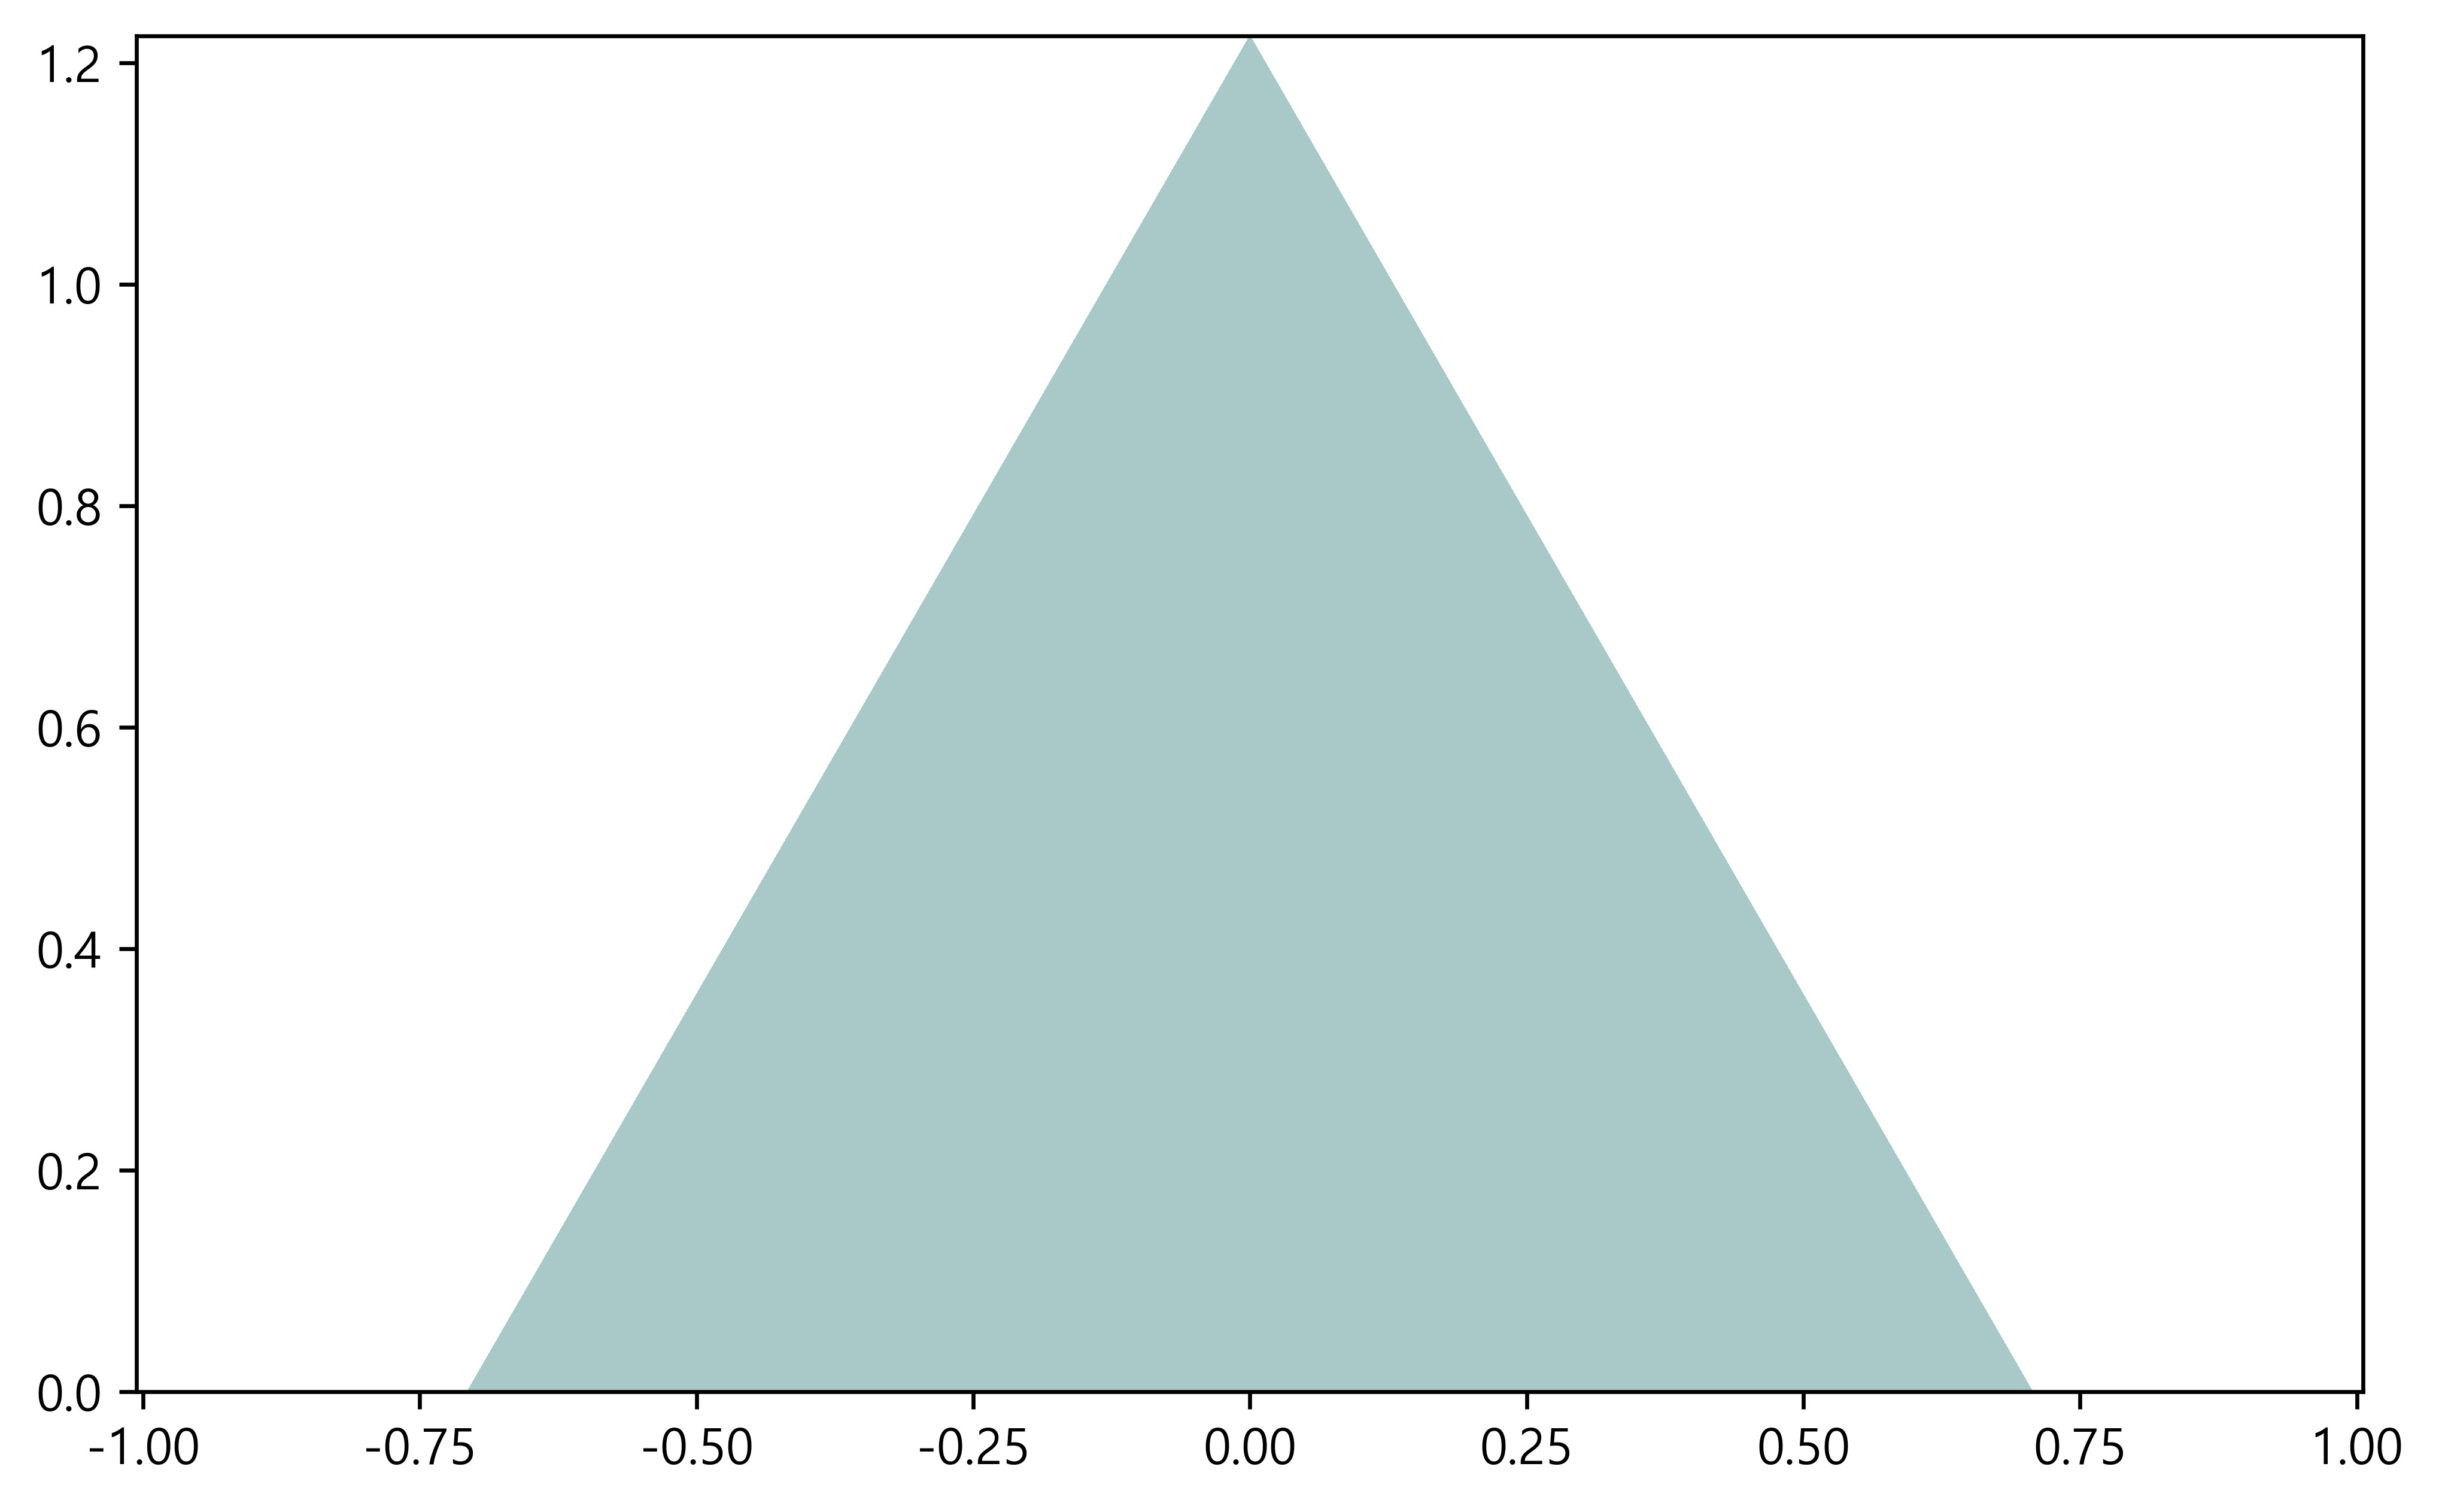

In [14]:
pdf = sp.stats.dirichlet((1, 1, 1)).pdf(XYZ.T)
plt.tricontourf(triang2, pdf, cmap=plt.cm.bone)
plt.axis("equal")
plt.show()

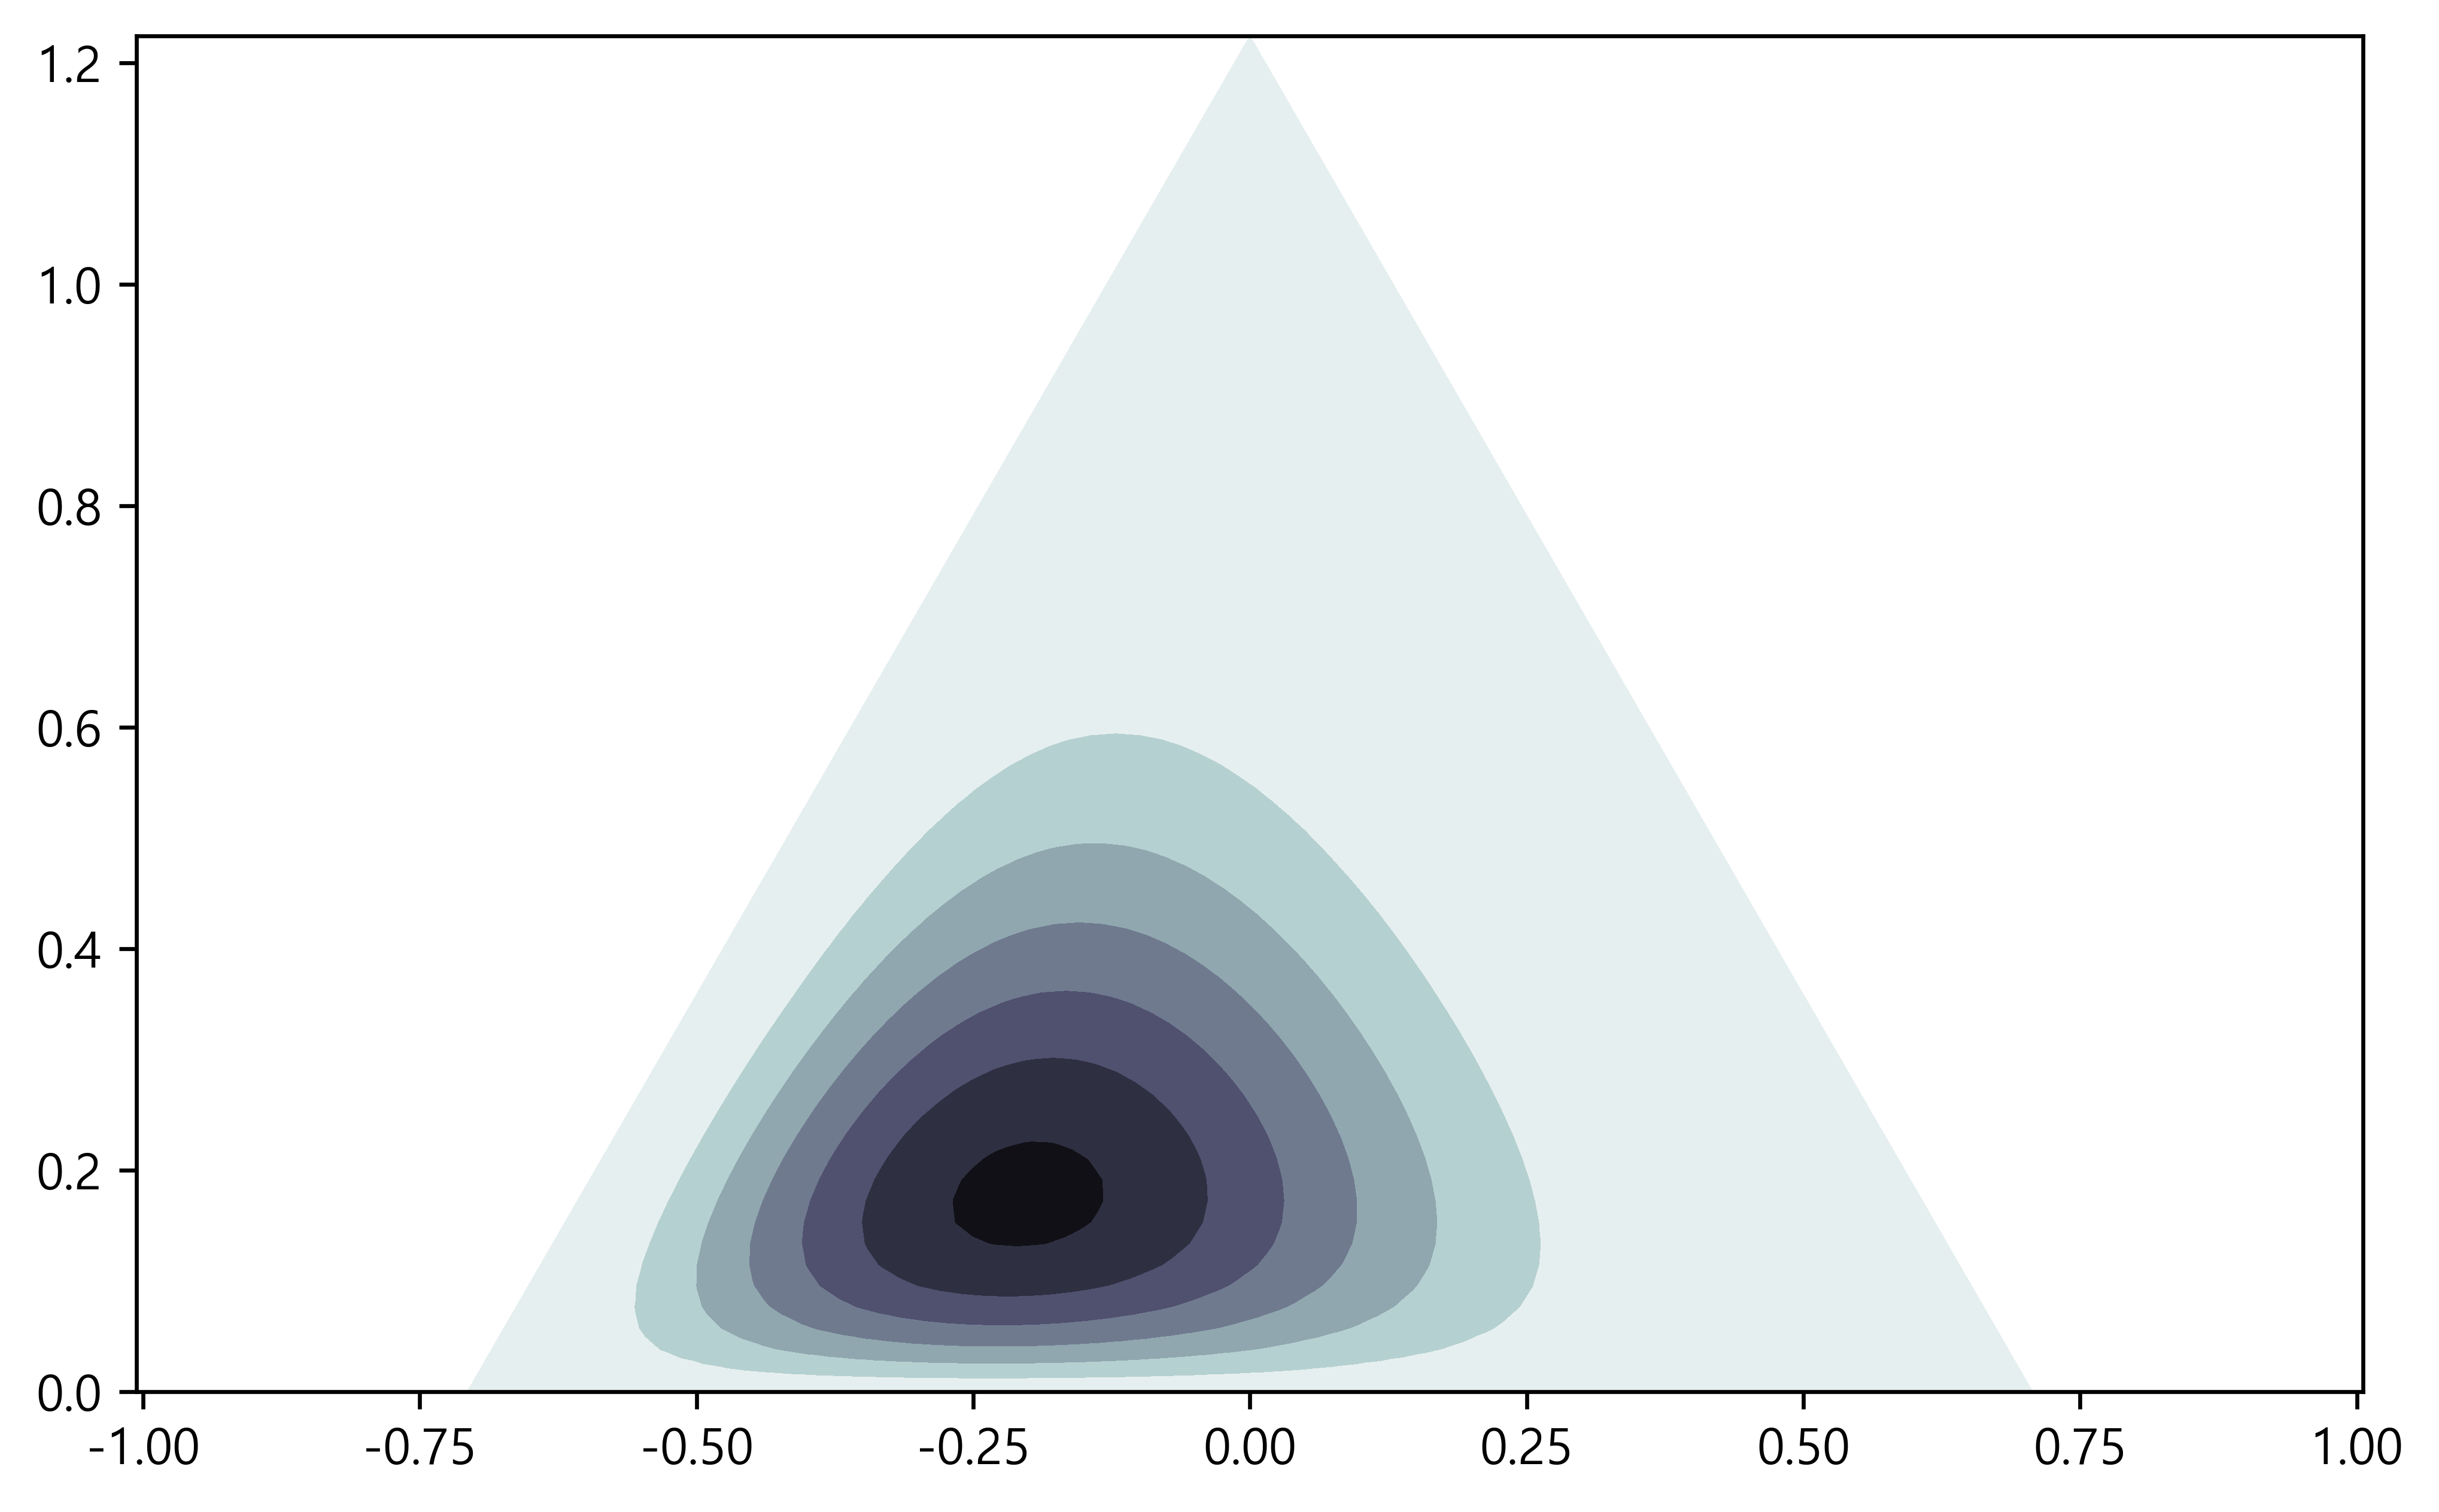

In [16]:
pdf = sp.stats.dirichlet((3, 5, 2)).pdf(XYZ.T)
plt.tricontourf(triang2, pdf, cmap=plt.cm.bone_r)
plt.axis("equal")
plt.show()

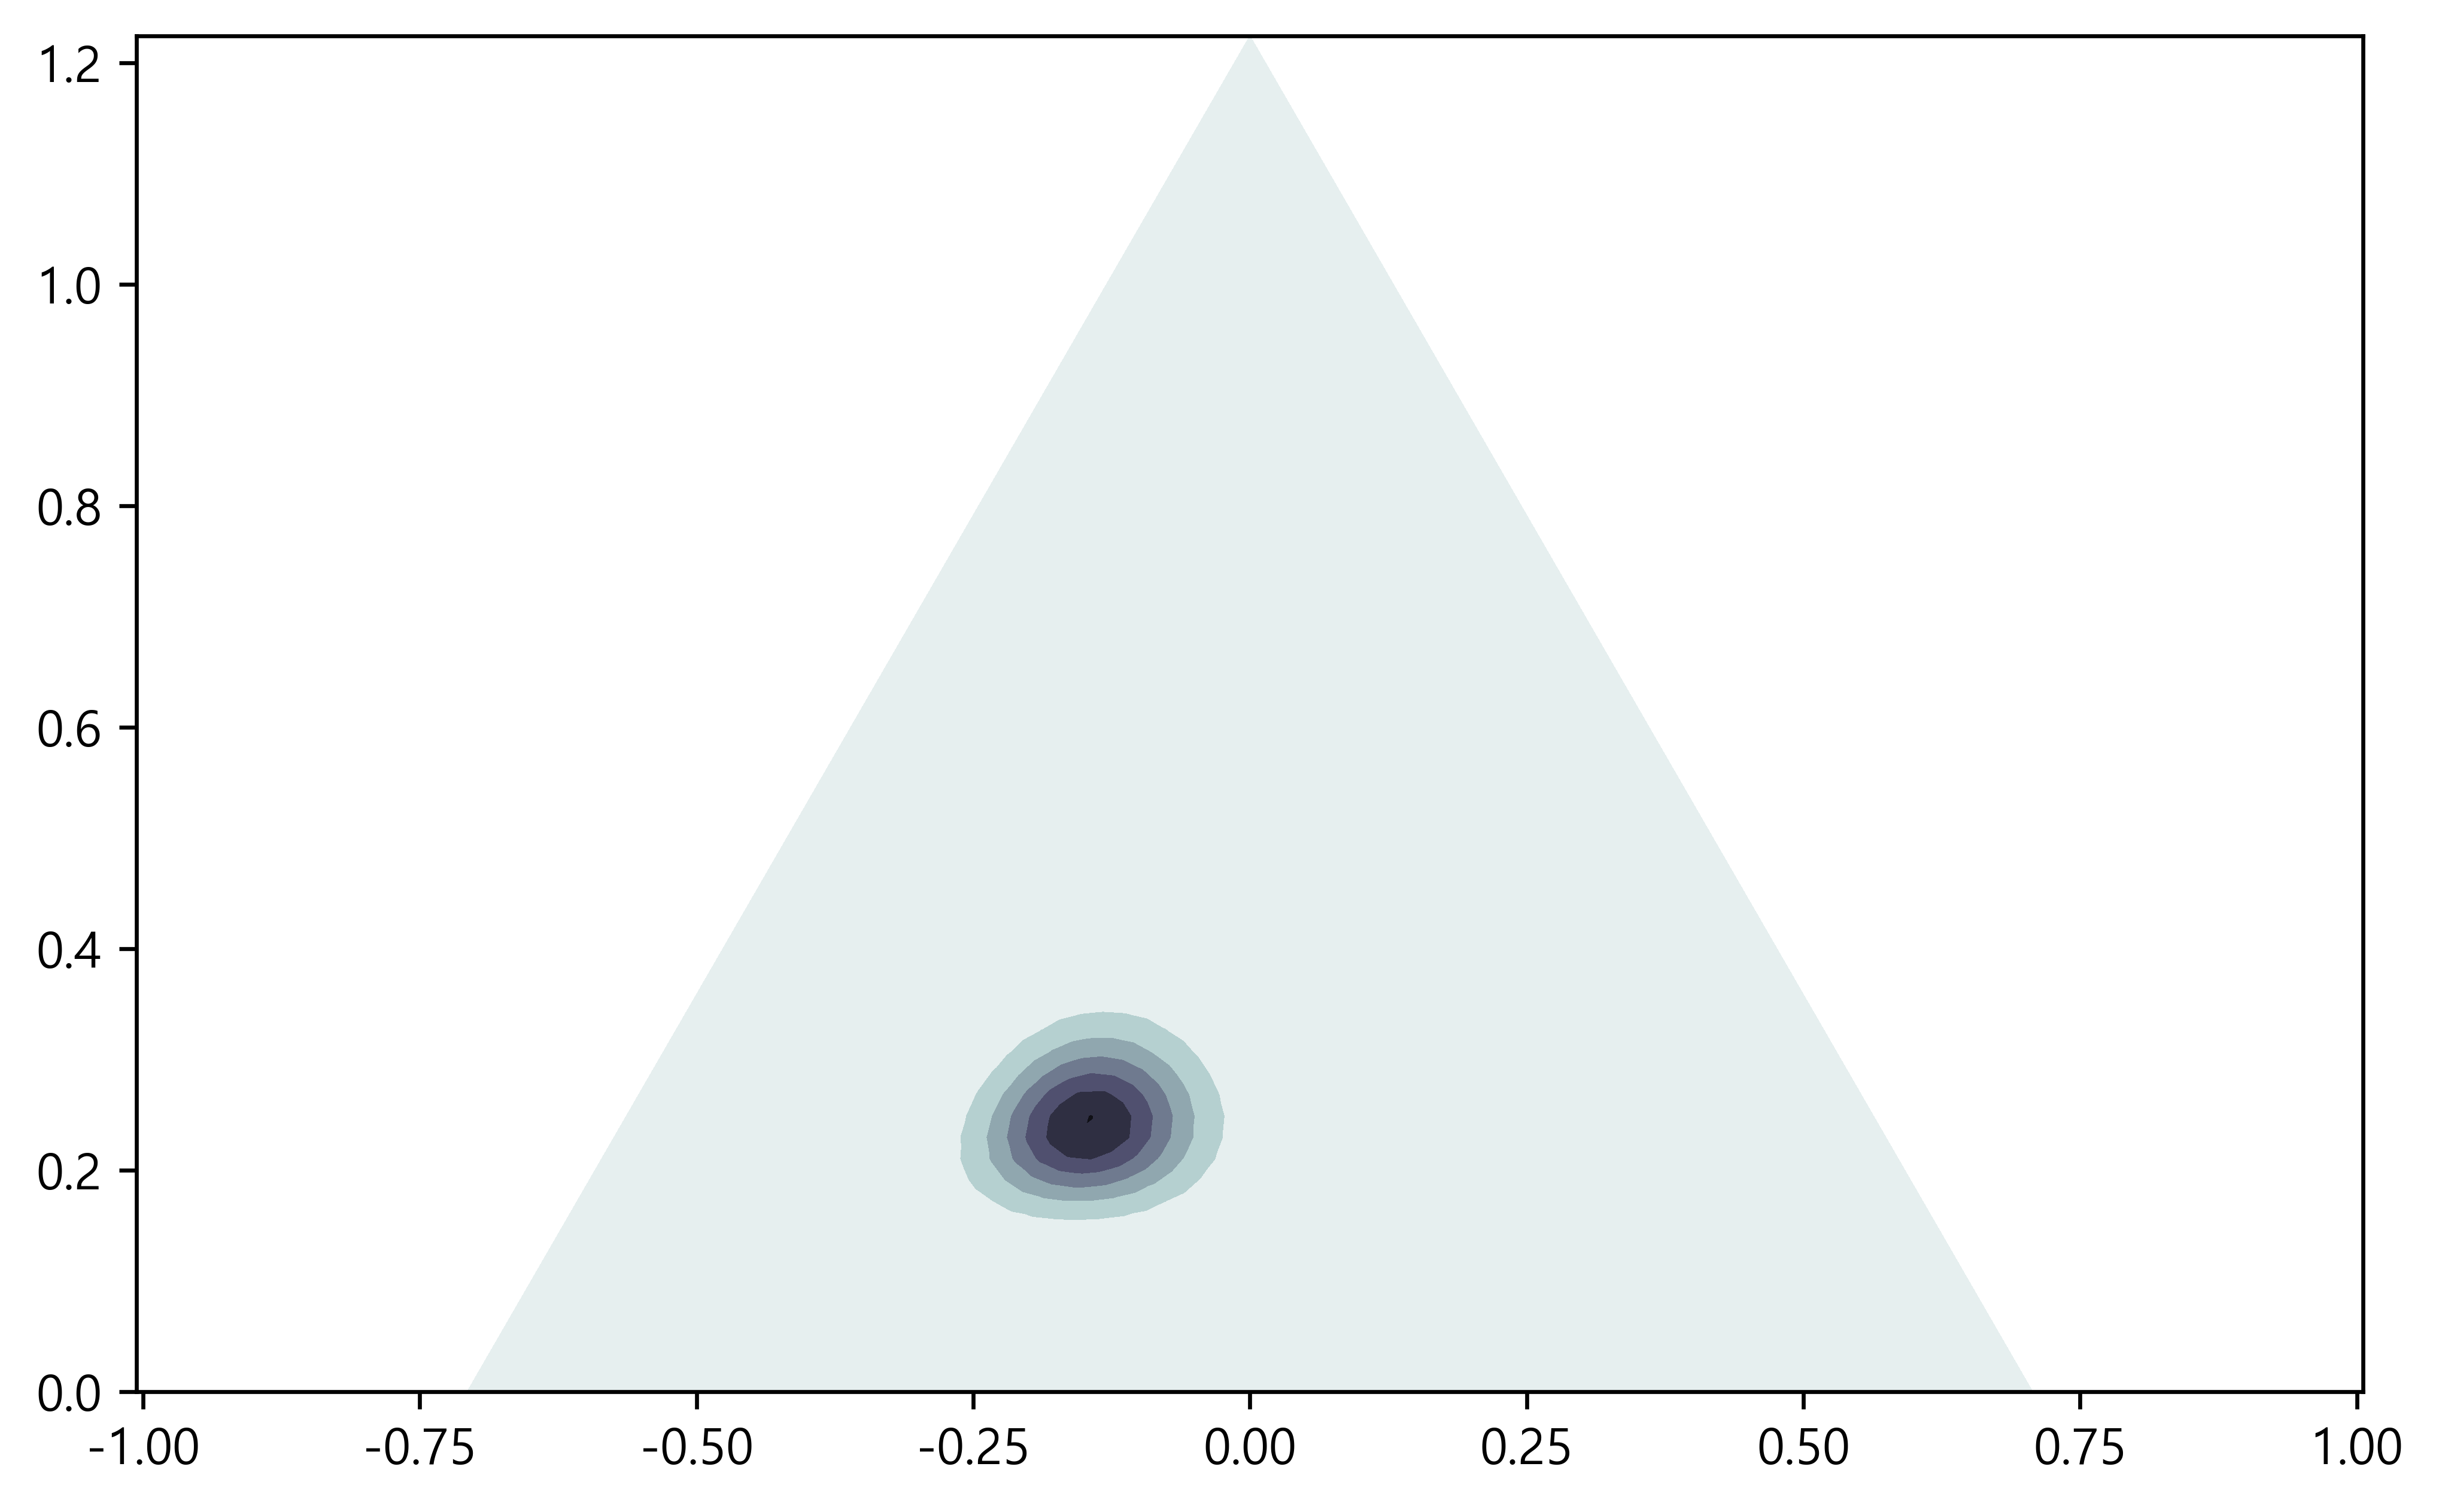

In [19]:
pdf = sp.stats.dirichlet((30, 50, 20)).pdf(XYZ.T)
plt.tricontourf(triang2, pdf, cmap=plt.cm.bone_r)
plt.axis("equal")
plt.show()